<a href="https://colab.research.google.com/github/juth-coder/AI-Chatbot-application/blob/main/Uber_Case_Study_Data_Analysis_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Rides Data Analysis

## Case Study Background

### Context
---

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day.

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it.

### Objective
---

Extract actionable insights around demand patterns across various factors.

### Some Key Questions
---

1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?


### Dataset Description
---

The data contains information about the weather, location, and pickups.

* pickup_dt: Date and time of the pick-up
* borough: The borough where the pickup occurred
* pickups: Number of pickups for the period (1 hour)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

## Installing the necessary libraries

In [ ]:
# ! pip install datetime

## Importing the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

from google.colab import files
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from typing_extensions import dataclass_transform

# Library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace 'your_file_id' with the file's ID you want to access on Google Drive
downloaded = drive.CreateFile({'id': '114goyzhv51rhY7Lpw5fB2YjBeTTEFz47'})
downloaded.GetContentFile('data.csv')  # Download file as 'local_filename.csv'

In [ ]:
# Now, you can read the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')
df.head()

pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
0  2015-01-01 01:00:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5   
1  2015-01-01 01:00:00   Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5   
2  2015-01-01 01:00:00        EWR        0  5.0  10.0  30.0   7.0  1023.5   
3  2015-01-01 01:00:00  Manhattan     5258  5.0  10.0  30.0   7.0  1023.5   
4  2015-01-01 01:00:00     Queens      405  5.0  10.0  30.0   7.0  1023.5   

   pcp01  pcp06  pcp24   sd hday  
0    0.0    0.0    0.0  0.0    Y  
1    0.0    0.0    0.0  0.0    Y  
2    0.0    0.0    0.0  0.0    Y  
3    0.0    0.0    0.0  0.0    Y  
4    0.0    0.0    0.0  0.0    Y

**Observations:**

* The column `pickup_dt` includes the pickup date and time.
* The column `borough` contains the name of the New York borough in which the pickup was made.
* The column `pickups` contain the number of pickups in the borough at the given time.
* All of the weather variables are numerical.
* The variable holiday is a categorical variable.

## Understanding data structure
* Initial Exploration: Understand the structure, fields, and types of data available.

### Initial Exploration:
* Understand the structure, fields, and types of data available.

In [ ]:
# check the shape of the dataset
df.shape

(29101, 13)

**Observations:**

* The dataset has **29,101 rows and 13 columns**.

In [ ]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


**Observations:**

* All columns have `29,101` observations except borough, which has `26,058` observations indicating the presence of null values.
* `pickup_dt` is read as an `'object'` data type, but it should have the data type as `DateTime`.
* `borough` and `hday` (holiday) should be categorical variables.

We will clean those up in the data processing phase.

In [ ]:
### Summary of the data
df.describe().T

count         mean         std    min     25%     50%          75%  \
pickups  29101.0   490.215903  995.649536    0.0     1.0    54.0   449.000000   
spd      29101.0     5.984924    3.699007    0.0     3.0     6.0     8.000000   
vsb      29101.0     8.818125    2.442897    0.0     9.1    10.0    10.000000   
temp     29101.0    47.669042   19.814969    2.0    32.0    46.0    64.500000   
dewp     29101.0    30.823065   21.283444  -16.0    14.0    30.0    50.000000   
slp      29101.0  1017.817938    7.768796  991.4  1012.5  1018.2  1022.900000   
pcp01    29101.0     0.003830    0.018933    0.0     0.0     0.0     0.000000   
pcp06    29101.0     0.026129    0.093125    0.0     0.0     0.0     0.000000   
pcp24    29101.0     0.090464    0.219402    0.0     0.0     0.0     0.050000   
sd       29101.0     2.529169    4.520325    0.0     0.0     0.0     2.958333   

             max  
pickups  7883.00  
spd        21.00  
vsb        10.00  
temp       89.00  
dewp       73.00  
slp      1043.40  
pcp01       0.28  
pcp06       1.24  
pcp24       2.10  
sd         19.00

**Observations:**

* There is a significant discrepancy between the third quartile and the highest value for the number of pickups (pickups) and the snow depth (sd), indicating that these variables may have outliers to the right.
* The temperature has a broad range, showing that the data includes records from the winter as well as summer seasons.

In [ ]:
df.describe(exclude = 'number').T

count unique                  top   freq
pickup_dt  29101   4343  2015-01-01 01:00:00      7
borough    26058      6                Bronx   4343
hday       29101      2                    N  27980

**Observations:**

* The variable `borough` has six unique categories. The category Bronx has occurred 4,343 times in the data.
* The variable `hday` has 2 unique categories. The category N, i.e., not a holiday as occurred more often, which makes sense.

## Data Cleaning and Preparation:
* Convert pickup_dt to a datetime format for better temporal analysis.
* Check for missing values and outliers in key columns like pickups, temp, spd, etc.
* Validate the data types for each column.

#### 1. Convert pickup_dt to a Datetime Format
This step is essential for temporal analysis. The pickup_dt column contains date and time information, but it's likely in a string format. Converting it to a datetime format allows us to perform time-based operations and analyses more efficiently.

In [ ]:
# Converting pickup_dt datatype to datetime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

# Extracting date parts from pickup_dt
df['year'] = df.pickup_dt.dt.year
df['month'] = df.pickup_dt.dt.month_name()
df['hour'] = df.pickup_dt.dt.hour
df['day'] = df.pickup_dt.dt.day
df['weekday'] = df.pickup_dt.dt.day_name()

In [ ]:
# Removing pickup_dt column
# df.drop('pickup_dt', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
 13  year       29101 non-null  int64         
 14  month      29101 non-null  object        
 15  hour       29101 non-null  int64         
 16  day        29101 non-null  int64        

In [ ]:
df.head()

pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
0 2015-01-01 01:00:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5   
1 2015-01-01 01:00:00   Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5   
2 2015-01-01 01:00:00        EWR        0  5.0  10.0  30.0   7.0  1023.5   
3 2015-01-01 01:00:00  Manhattan     5258  5.0  10.0  30.0   7.0  1023.5   
4 2015-01-01 01:00:00     Queens      405  5.0  10.0  30.0   7.0  1023.5   

   pcp01  pcp06  pcp24   sd hday  year    month  hour  day   weekday  
0    0.0    0.0    0.0  0.0    Y  2015  January     1    1  Thursday  
1    0.0    0.0    0.0  0.0    Y  2015  January     1    1  Thursday  
2    0.0    0.0    0.0  0.0    Y  2015  January     1    1  Thursday  
3    0.0    0.0    0.0  0.0    Y  2015  January     1    1  Thursday  
4    0.0    0.0    0.0  0.0    Y  2015  January     1    1  Thursday

#### Identifying Missing Values
We need to identify if there are any missing values in key columns like pickups, temp, spd, etc. Missing values can distort our analysis and need to be handled appropriately.

In [ ]:
# Find missing values
missing_values = df.isnull().sum()

# Filter out columns with no missing values for display
missing_values = missing_values[missing_values > 0]

# Print out the findings
print("Number of Missing Values in Each Column:\n")
print(missing_values)

Number of Missing Values in Each Column:

borough    3043
dtype: int64


**Observations:**

* The bar plot clearly shows that the only column with missing values is borough, with over 3,000 missing entries.
* All other columns have no missing values.

In [ ]:
# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Print out the findings
print("Percentage of Missing Values in Each Column:\n")

for col in missing_percentage.index:
    print(f"{col}: {missing_percentage[col]:.1f}% missing values")

# Optional: You can also print a warning or note if the percentage of missing values is above a certain threshold
threshold = 5  # Set your desired threshold
for col in missing_percentage.index:
    if missing_percentage[col] > threshold:
        print(f"Warning: {col} has {missing_percentage[col]:.1f}% missing values, which is above the {threshold}% threshold.")

Percentage of Missing Values in Each Column:

borough: 10.5% missing values


In [ ]:
# Checking the missing values further
df.borough.value_counts(normalize = True, dropna = False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

**Observations:**

* All the six categories have the same percentage, i.e., ~15%. There is no mode (or multiple modes) for this variable.
* The percentage of missing values is close to the percentage of observations from other boroughs.
* We can treat the missing values as a separate category for this variable.

#### Addressing Missing Data:
Given the significance of the borough column in geographical analysis, the records with missing borough values should either be imputed (if possible) or removed.

In [ ]:
# Replacing NaN values in 'borough' with 'Unknown'
df['borough'].fillna('Unknown', inplace=True)

# Observations after replacing NaN values
borough_distribution_post_replacement = df['borough'].value_counts()

borough_distribution_post_replacement

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: borough, dtype: int64

**Observations:**
1. `Inclusion of 'Unknown' Category:` By replacing NaN values in the 'borough' column with 'Unknown', we have added a new category to our dataset. This category now accounts for 3,043 records.
2. `Distribution Impact:` Each of the known boroughs (Bronx, Brooklyn, EWR, Manhattan, Queens, Staten Island) is equally represented with 4,343 records each. The 'Unknown' category forms a significant portion of the dataset, indicating a considerable number of rides where the borough information is missing.

In [ ]:
df.isnull().sum()

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
year         0
month        0
hour         0
day          0
weekday      0
dtype: int64

#### Check for Outliers
Outliers can significantly affect the results of our analysis, especially in key columns. We'll use statistical methods to identify any outliers in these columns.

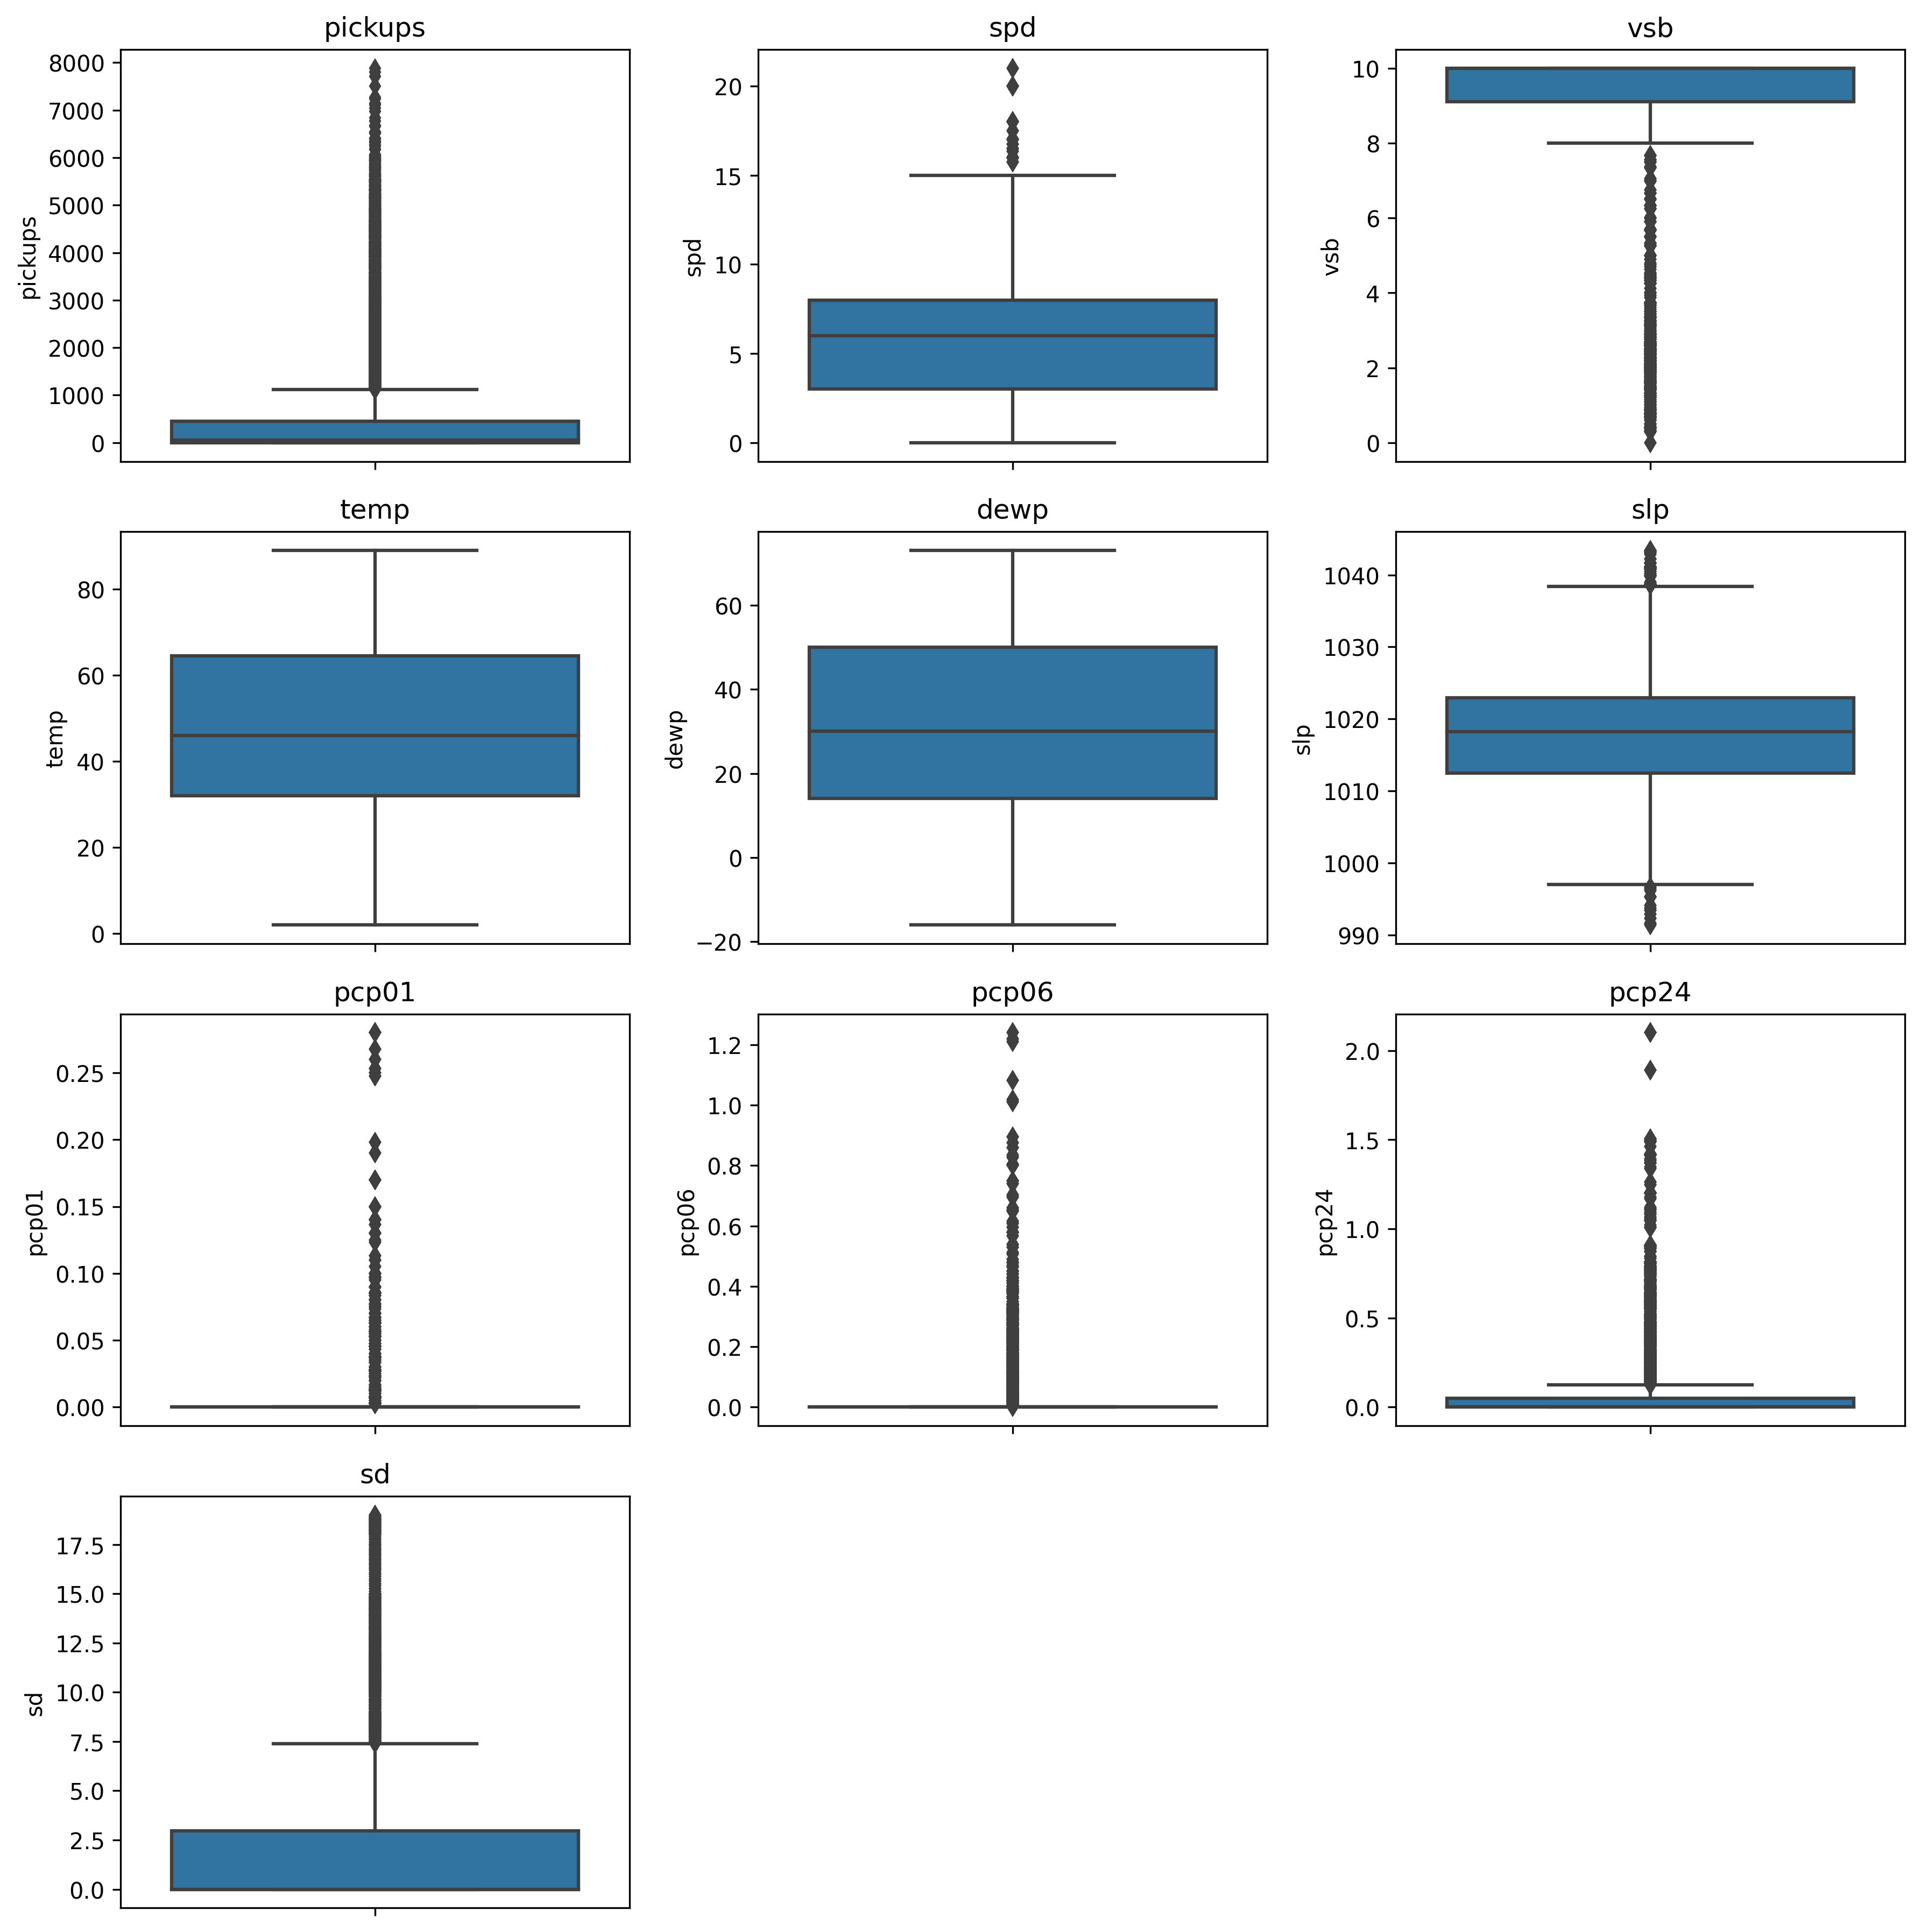

In [ ]:
# Identifying numerical columns for outlier detection
numerical_cols = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Setting up the plot
plt.figure(figsize=(12, 18), dpi=300)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Observations:**

1. Pickups: Shows a concentration of lower values with several outliers indicating very high numbers of pickups.
2. Spd (Wind Speed): Most values are concentrated in a lower range with some outliers suggesting occasional high wind speeds.
3. Vsb (Visibility): Visibility is generally high with a few instances of low visibility, indicated as outliers.
4. Temp (Temperature): Temperature distribution appears fairly normal with a few outliers on the lower end, indicating extremely cold conditions.
5. Dewp (Dew Point): Similar to temperature, with a few low outliers.
6. Slp (Sea Level Pressure): Shows a relatively stable range with some high and low outliers.
7. Pcp01 (Precipitation in the Last Hour): Mostly concentrated at zero with outliers indicating instances of heavy rainfall.
8. Pcp06 (Precipitation in the Last 6 Hours): Similar to Pcp01, indicating sporadic heavy rainfall events.
9. Pcp24 (Precipitation in the Last 24 Hours): Again, similar pattern with most values at zero and some significant outliers.
10. Sd (Snow Depth): Primarily at zero, suggesting snow is uncommon, but with outliers showing some days with considerable snow depth.

**Interpretation and Next Steps**
* These outliers may represent unusual weather conditions or special events.
* For more accurate analysis, we can either exclude these outliers or analyze them separately to understand their impact on Uber's ride demand.
* Handling outliers appropriately is crucial, especially in predictive modeling, to avoid skewing the results.

#### Handling Outliers:

Handling outliers in a dataset requires a balanced approach, especially in a dataset like Uber's rides data, where outliers could be indicative of special events or unique circumstances.

For the Uber dataset, capping outliers could standardize the data for general trend analysis, while separately analyzing outliers could provide insights into demand patterns during special occasions.

In [ ]:
# Identifying numerical columns for outlier detection
numerical_cols = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Calculating IQR and identifying outliers for each numerical column
outliers_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers are those values outside the lower and upper bounds
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers.shape[0]
    }

outliers_summary

{'pickups': {'lower_bound': -671.0,
  'upper_bound': 1121.0,
  'outliers_count': 3498},
 'spd': {'lower_bound': -4.5, 'upper_bound': 15.5, 'outliers_count': 451},
 'vsb': {'lower_bound': 7.749999999999999,
  'upper_bound': 11.350000000000001,
  'outliers_count': 5322},
 'temp': {'lower_bound': -16.75, 'upper_bound': 113.25, 'outliers_count': 0},
 'dewp': {'lower_bound': -40.0, 'upper_bound': 104.0, 'outliers_count': 0},
 'slp': {'lower_bound': 996.9000000000001,
  'upper_bound': 1038.5,
  'outliers_count': 279},
 'pcp01': {'lower_bound': 0.0, 'upper_bound': 0.0, 'outliers_count': 2633},
 'pcp06': {'lower_bound': 0.0, 'upper_bound': 0.0, 'outliers_count': 5641},
 'pcp24': {'lower_bound': -0.07500000000000001,
  'upper_bound': 0.125,
  'outliers_count': 5016},
 'sd': {'lower_bound': -4.437499999999995,
  'upper_bound': 7.395833333333325,
  'outliers_count': 6060}}

**Observations:**

* Significant Outliers in Weather-Related Columns: The columns vsb, pcp01, pcp06, pcp24, and sd show a large number of outliers, indicating significant variation in weather conditions.
* Pickups: The outliers in the pickups column could represent times of unusually high or low demand.
* Wind Speed: A moderate number of outliers in the spd column suggest occasional extreme wind conditions.

Considerations for Analysis
* Weather Impact: The high number of outliers in weather-related columns suggests that weather conditions might significantly impact Uber's ride demand.
* Dynamic Demand: The outliers in pickups may be crucial for understanding dynamic demand patterns, possibly influenced by external factors like events, holidays, or weather.
* Data Contextualization: It's important to contextualize these outliers within the broader data. For example, extreme weather conditions might correspond with either spikes or drops in ride demand.

Next Steps
We can choose to either cap these outliers, analyze them separately, or consider them in the context of external factors (like weather events or special occasions).

##### 1. Capping Outliers at Thresholds
In this scenario, we'll replace the outlier values with the upper or lower bounds.

In [ ]:
# uber_data_capped = df.copy()
# for col in numerical_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Capping the outliers
#     uber_data_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

##### 2. Separately Analyzing Outliers
Here, we'll create a separate dataset for the outliers to analyze them independently.

In [ ]:
# outliers_data = pd.DataFrame()
# for col in numerical_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Extracting outliers
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     outliers_data = pd.concat([outliers_data, outliers], ignore_index=True)

##### 3. Considering Outliers in the Context of External Factors
This approach involves analyzing outliers in relation to external factors like weather conditions or special events. It's more qualitative and requires contextual data.

In [ ]:
# # Example: Analyzing 'pickups' outliers on days with heavy precipitation
# heavy_precipitation_outliers = df[df['pcp24'] > df['pcp24'].quantile(0.99)]
# high_demand_days = heavy_precipitation_outliers[heavy_precipitation_outliers['pickups'] > df['pickups'].quantile(0.99)]

# # This dataset can then be analyzed to understand if heavy precipitation correlates with high demand

Let's proceed to the Exploratory Data Analysis (EDA) phase without altering the outliers is a prudent choice, especially when the nature and cause of these outliers are not clearly understood. This approach allows us to observe the data in its entirety and might reveal patterns or insights that could explain the outliers.

#### Validate Data Types
Ensuring that each column has the correct data type is crucial for analysis. For example, numerical columns should have types like int or float, and categorical columns should be of type object or category.

In [ ]:
data_types = df.dtypes
data_types

pickup_dt    datetime64[ns]
borough              object
pickups               int64
spd                 float64
vsb                 float64
temp                float64
dewp                float64
slp                 float64
pcp01               float64
pcp06               float64
pcp24               float64
sd                  float64
hday                 object
year                  int64
month                object
hour                  int64
day                   int64
weekday              object
dtype: object

**Observations:**

* The data types are well-aligned with the nature of the data in each column.
* Numeric columns like pickups, spd, temp, etc., are in formats suitable for quantitative analysis.
* Categorical columns like borough and hday are in the object type, which is standard for textual or categorical data.
* The datetime format of pickup_dt will facilitate time series analysis and other temporal comparisons.

The dataset is now well-structured for detailed exploratory analysis and modeling.

## Exploratory Data Analysis (EDA):

Let's break down the Exploratory Data Analysis (EDA) into focused areas and proceed step by step. We'll focus on both Univariate and Multivariate analysis, including the correlation of weather conditions with ride frequency.

#### Univariate Analysis
This involves examining each variable individually to understand its distribution and characteristics.

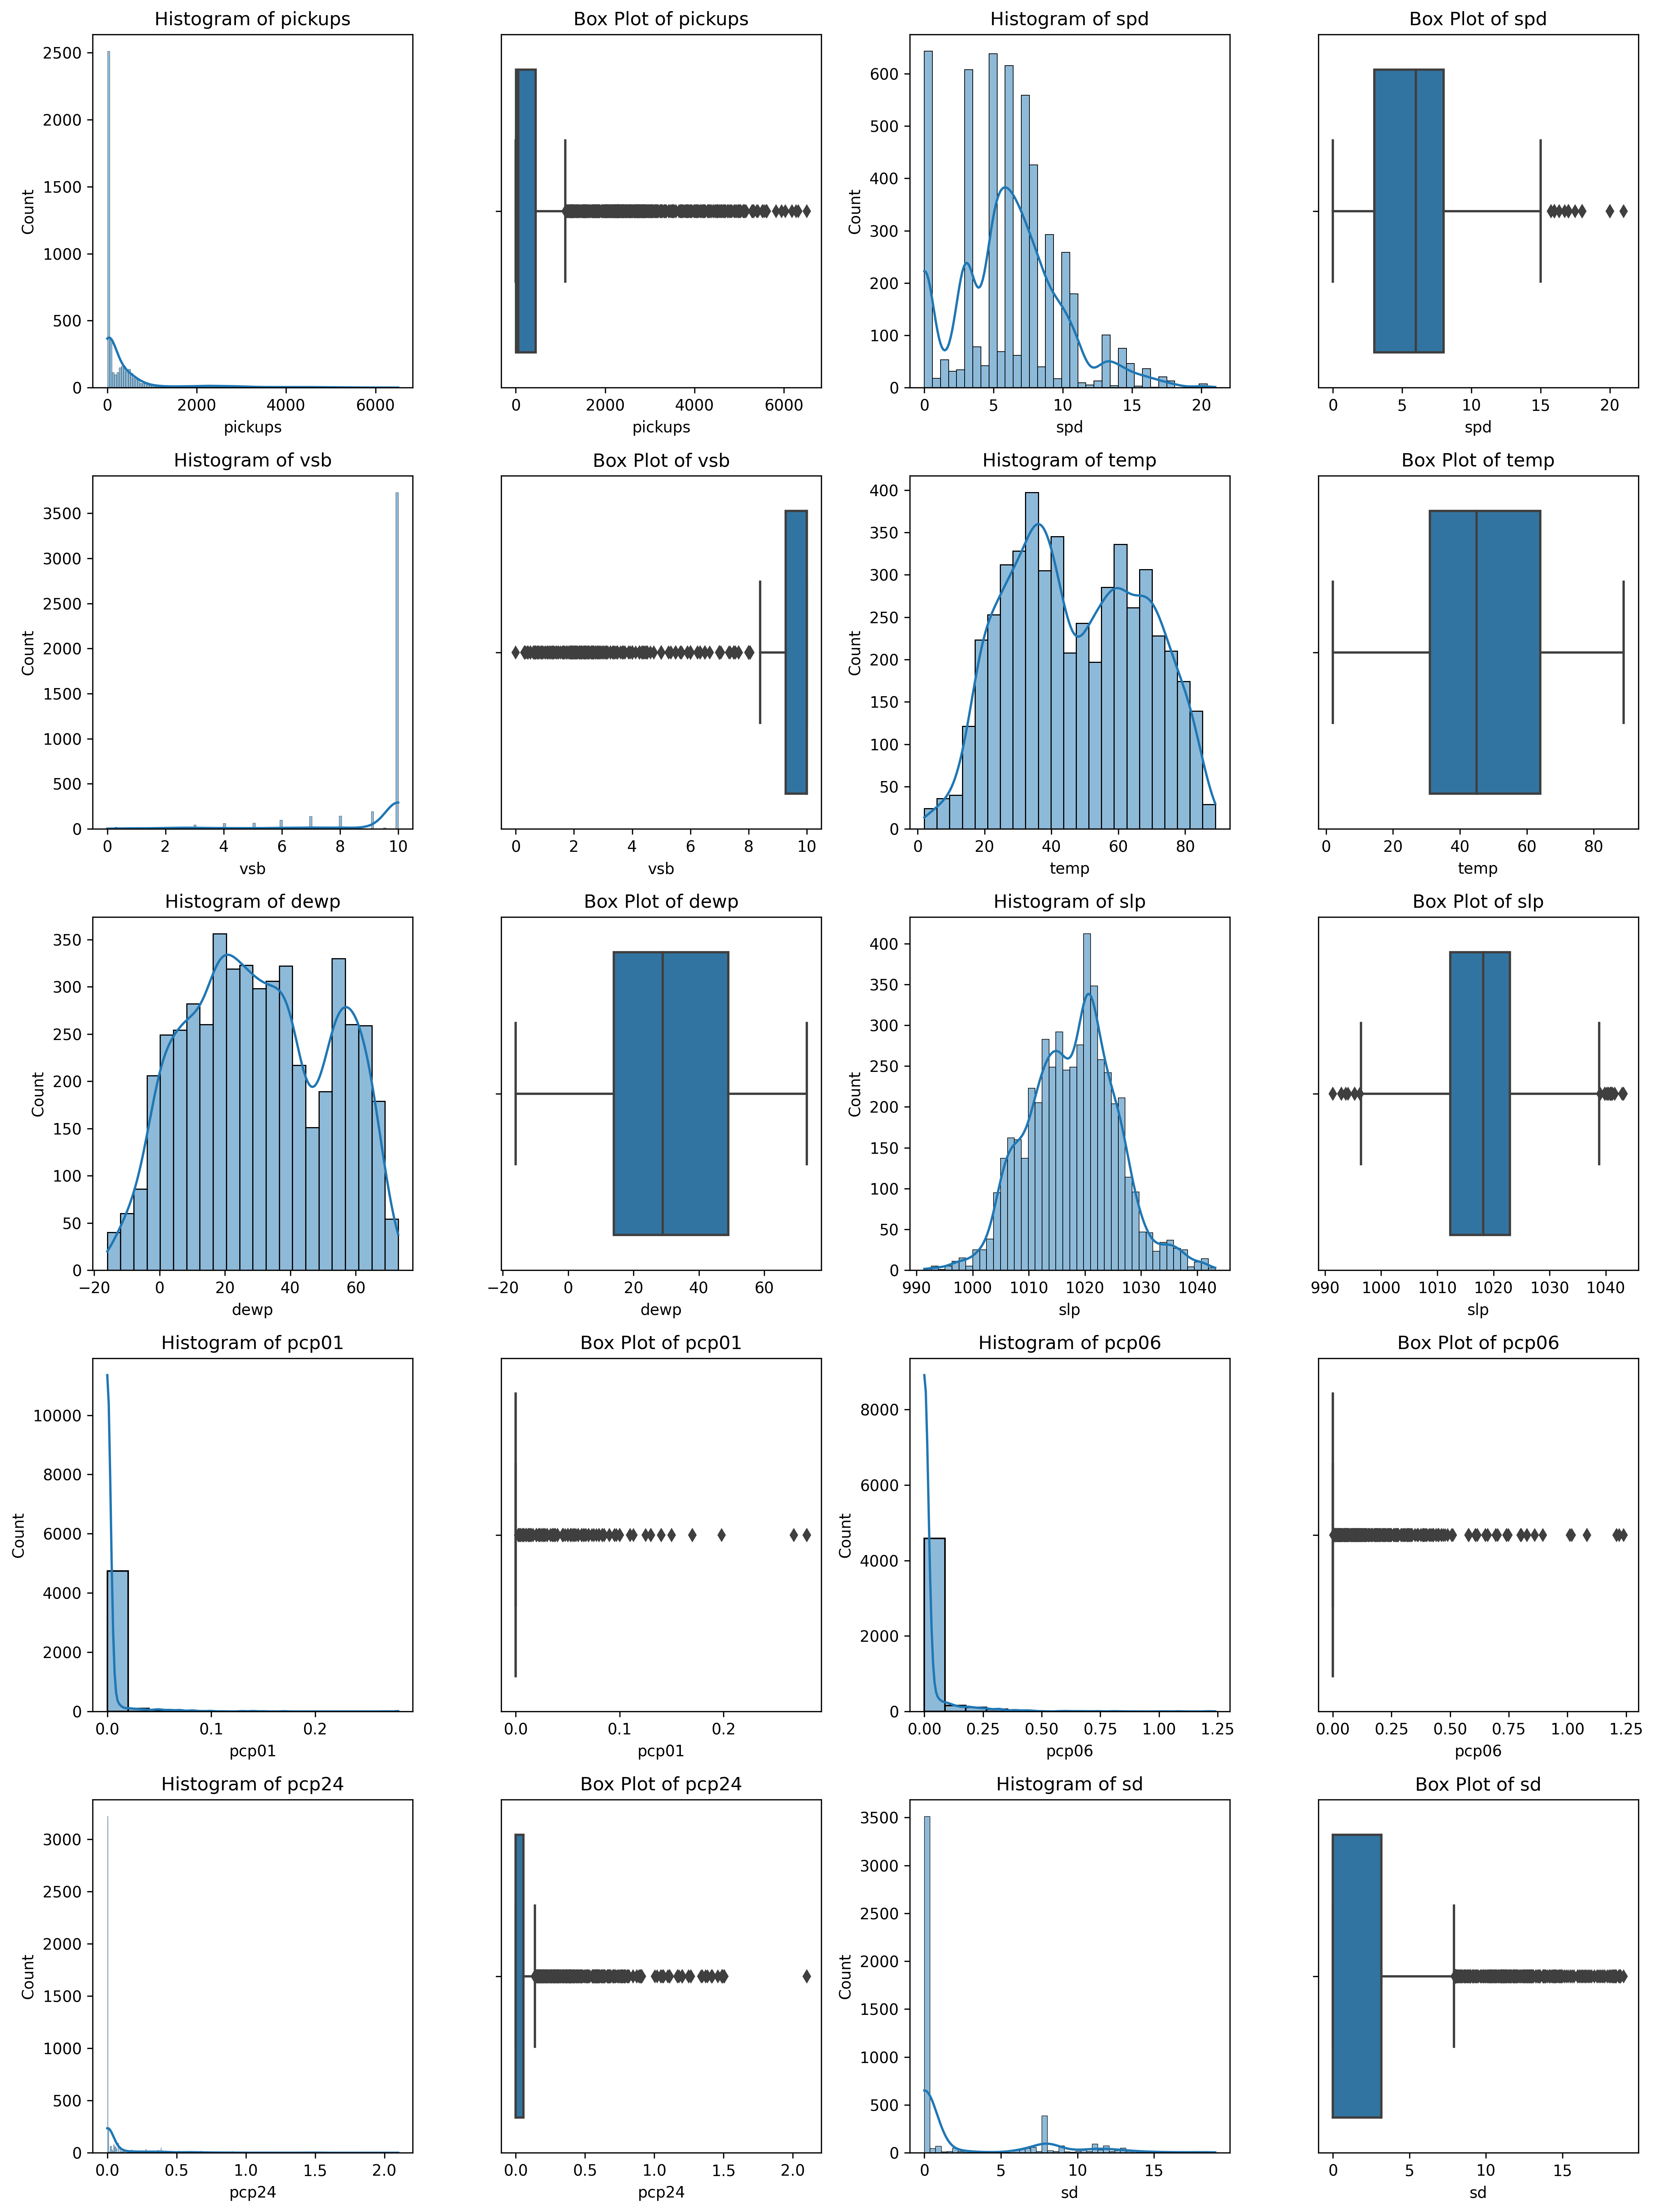

In [ ]:
# Univariate Analysis

# Selecting all numerical columns for Univariate Analysis
numerical_cols_univariate = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Sampling a subset of the data for visualization
sampled_data_univariate = df.sample(n=min(5000, len(df)), random_state=1)

# Plotting histograms and box plots for the numerical variables using the specified style
plt.figure(figsize=(15, 20), dpi=300)

for i, var in enumerate(numerical_cols_univariate, 1):
    plt.subplot(5, 4, i*2-1)
    sns.histplot(sampled_data_univariate[var], kde=True)
    plt.title(f'Histogram of {var}')

    plt.subplot(5, 4, i*2)
    sns.boxplot(x=sampled_data_univariate[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

**Observations:**

The histograms provide insights into the distribution of each numerical variable:

1. Pickups: The distribution is heavily right-skewed, indicating most pickup counts are low, with a few instances of very high counts.
2. Wind Speed (spd): Shows a somewhat right-skewed distribution, suggesting that lower wind speeds are more common.
3. Visibility (vsb): The distribution seems left-skewed with high visibility being more common.
4. Temperature (temp): Displays a relatively balanced distribution, indicating a wide range of temperatures.
5. Dew Point (dewp): Similar to temperature, the dew point shows a broad distribution, reflecting varying humidity conditions.
6. Sea Level Pressure (slp): Appears normally distributed, indicating stable pressure conditions most of the time.
7. Precipitation in the Last Hour (pcp01): Highly right-skewed, indicating precipitation is typically low or non-existent in most hours.
8. Precipitation in the Last 6 Hours (pcp06): Also right-skewed, similar to pcp01, suggesting low precipitation levels over a 6-hour period.
9. Precipitation in the Last 24 Hours (pcp24): Right-skewed, indicating days without or with little precipitation are more common.
10. Snow Depth (sd): Extremely right-skewed, showing that significant snow depth is rare.

These plots provide a detailed view of each variable's distribution and potential outliers. The weather-related variables show a range of conditions, with occasional extremes, which could significantly impact ride demand.

#### Multivariate Analysis Approach:

##### Relationship between variables:

Using a pair plot is an excellent idea to visualize the pairwise relationships and distributions of multiple variables simultaneously. In this case, we'll create a pair plot that includes `pickups` and the selected weather-related variables: ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd'].

Pair plots are particularly useful for identifying trends, correlations, and potential outliers in a more comprehensive and interconnected way.

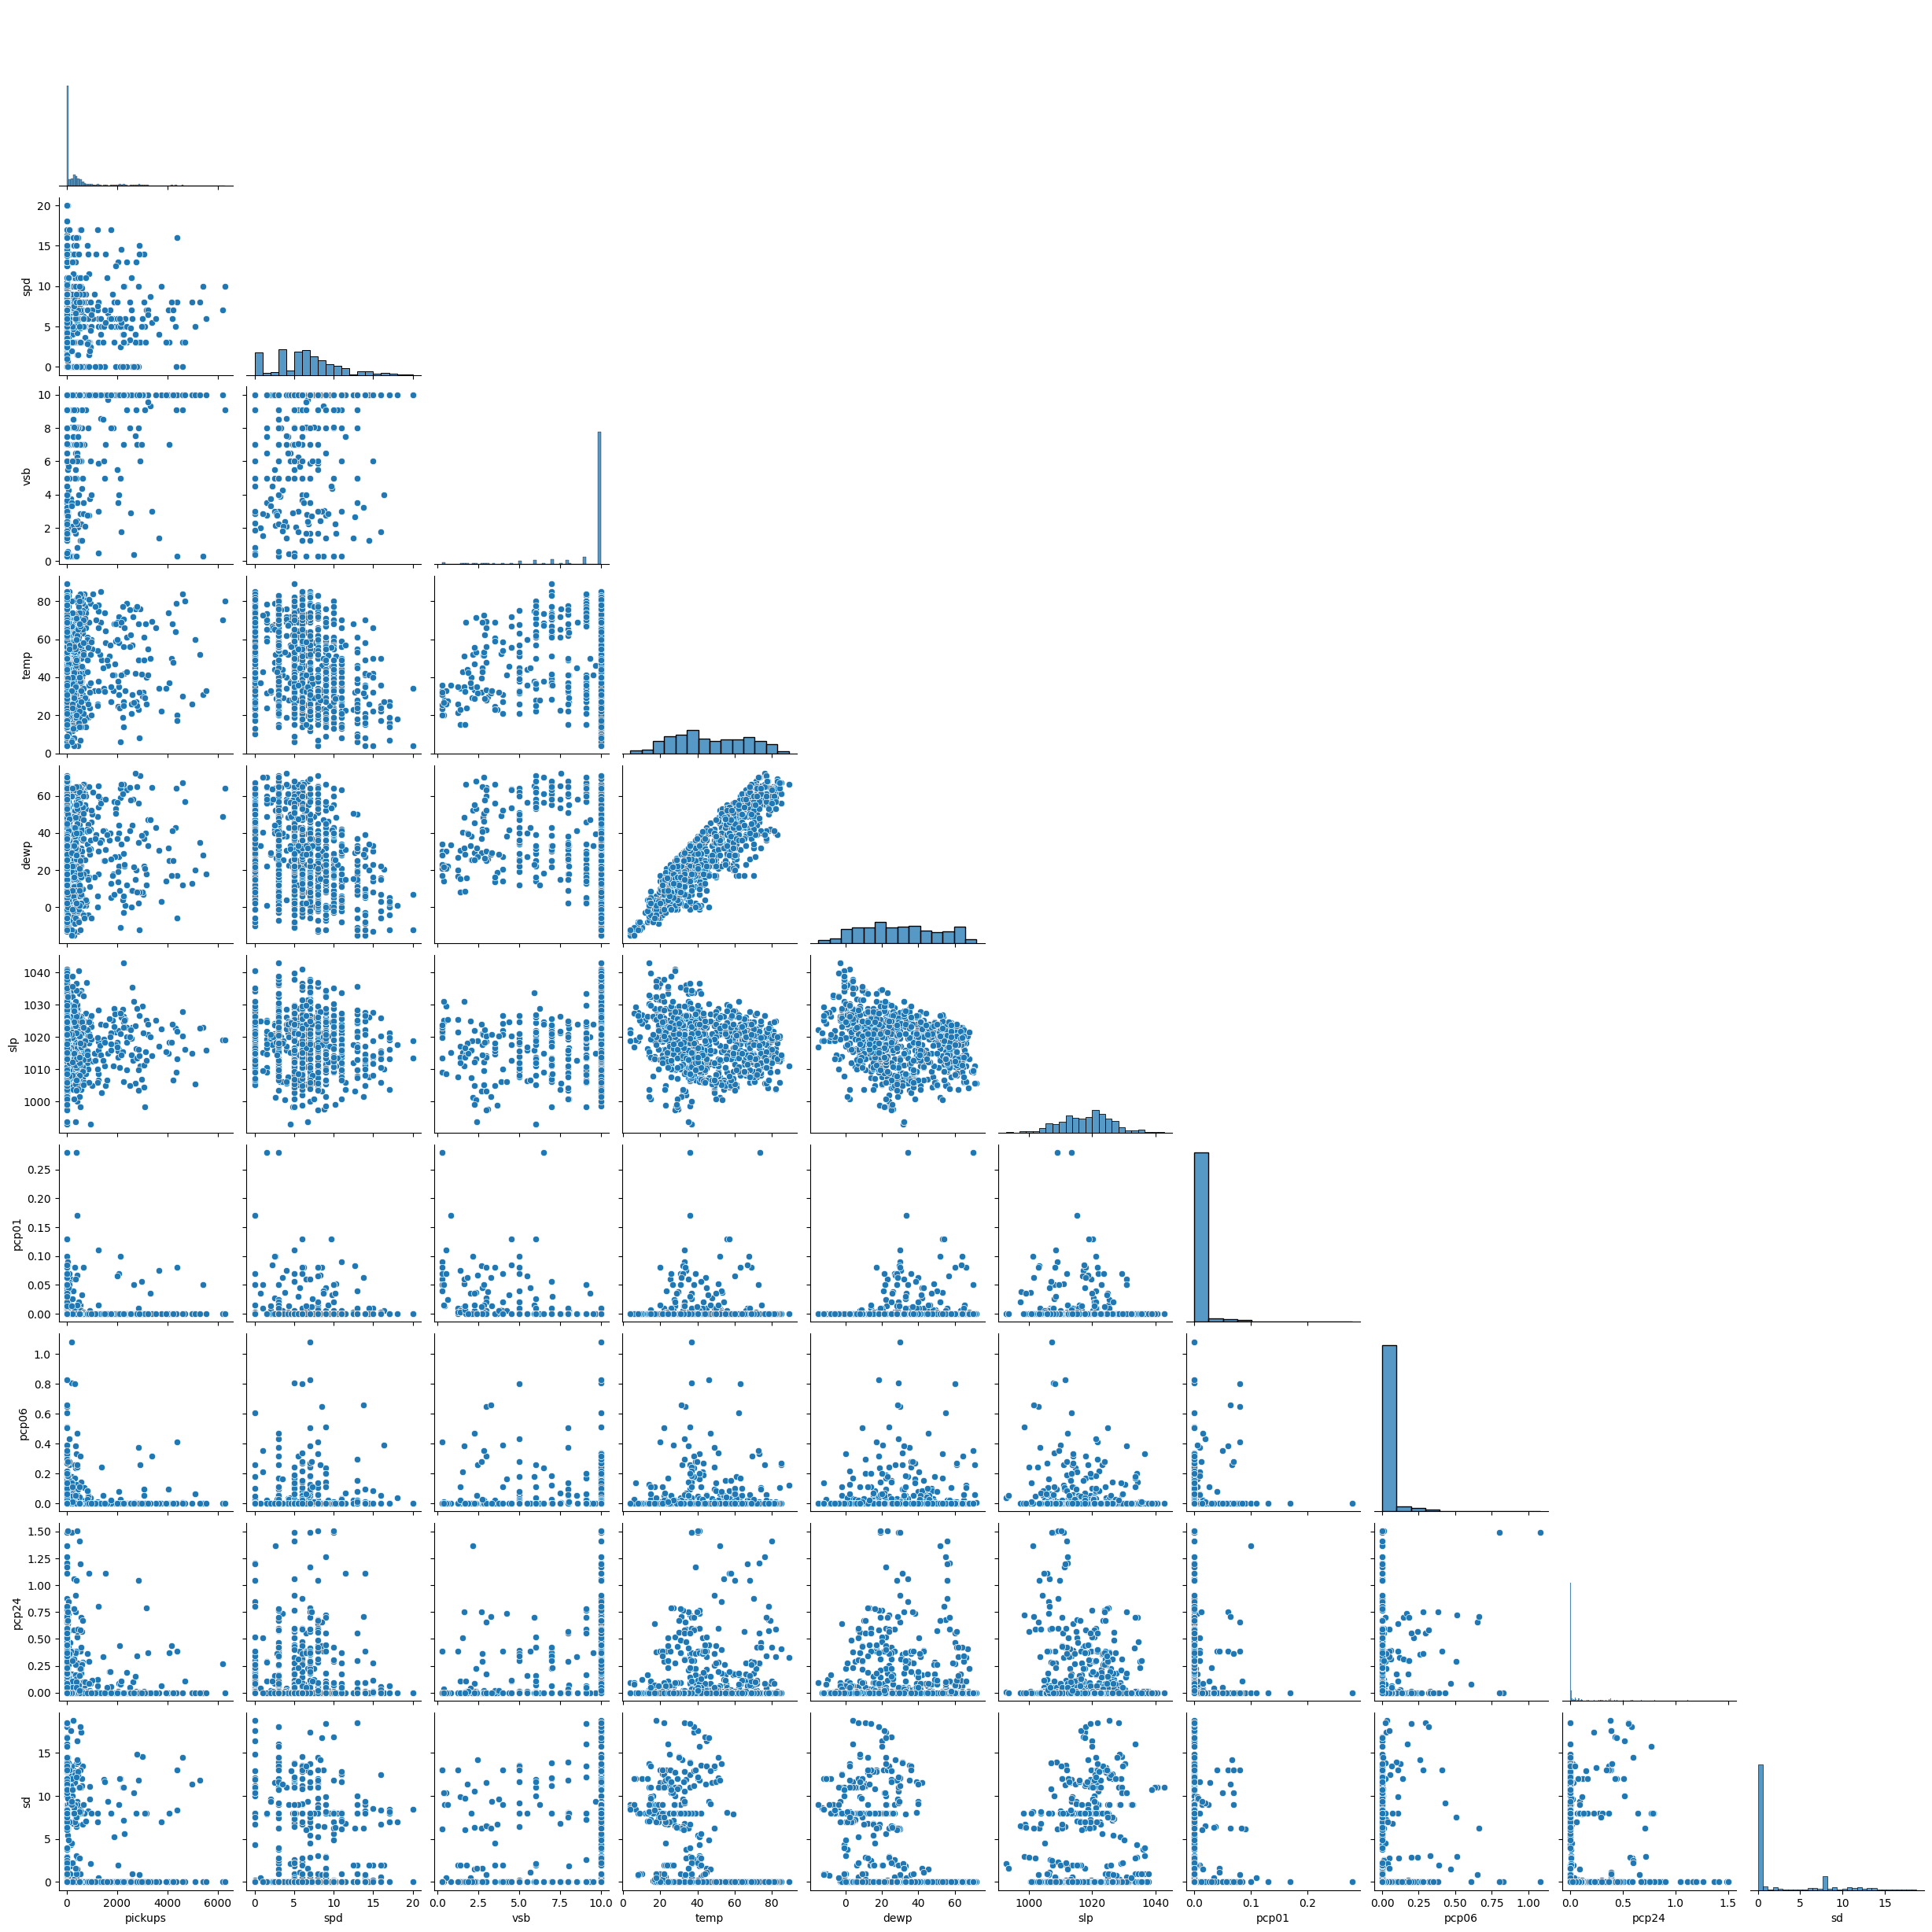

In [ ]:
# Creating a pair plot for the specified variables including 'pickups'
pairplot_variables = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Due to the size of the dataset, we'll use a sampled subset for the pair plot to ensure smooth execution
sampled_data_pairplot = sampled_data_univariate[pairplot_variables].sample(n=min(1000, len(sampled_data_univariate)), random_state=1)

# Generating the pair plot
sns.pairplot(sampled_data_pairplot, corner=True)
plt.show()

**Observations:**

The stairwise pair plot effectively visualizes the pairwise relationships and individual distributions of the selected variables, with the upper half of the plot matrix omitted for clarity. This format helps focus on the key aspects of each relationship:

1. Diagonal Plots (Histograms):
  * Display the distribution of each variable, with various levels of skewness and spread. This is particularly evident in the skewed distributions of precipitation-related variables and pickups.
2. Lower Half Plots (Scatter Plots):
  * Illustrate the pairwise relationships between variables.
  * Relationships between pickups and weather-related variables like temp, spd, and pcp01 show dispersed distributions, indicating no strong linear correlations.
  * Interactions among weather variables (like temp and dewp) also demonstrate varying degrees of correlation.

Insights

* This visual format allows for a focused analysis of how each variable relates to others, especially how different weather conditions might influence ride demand.
* The lack of strong linear patterns in scatter plots suggests that relationships might be more complex or influenced by additional factors not captured in these variables alone.

Conclusion

The stairwise pair plot emphasizes the multifaceted nature of the factors affecting ride demand. It underscores the need for a nuanced approach in any predictive modeling or demand forecasting analysis that includes these variables.

##### Correlation Heatmap
We will now compute and visualize a correlation matrix as a heatmap to see the strength and direction (positive/negative) of the relationships between pickups and these weather variables.

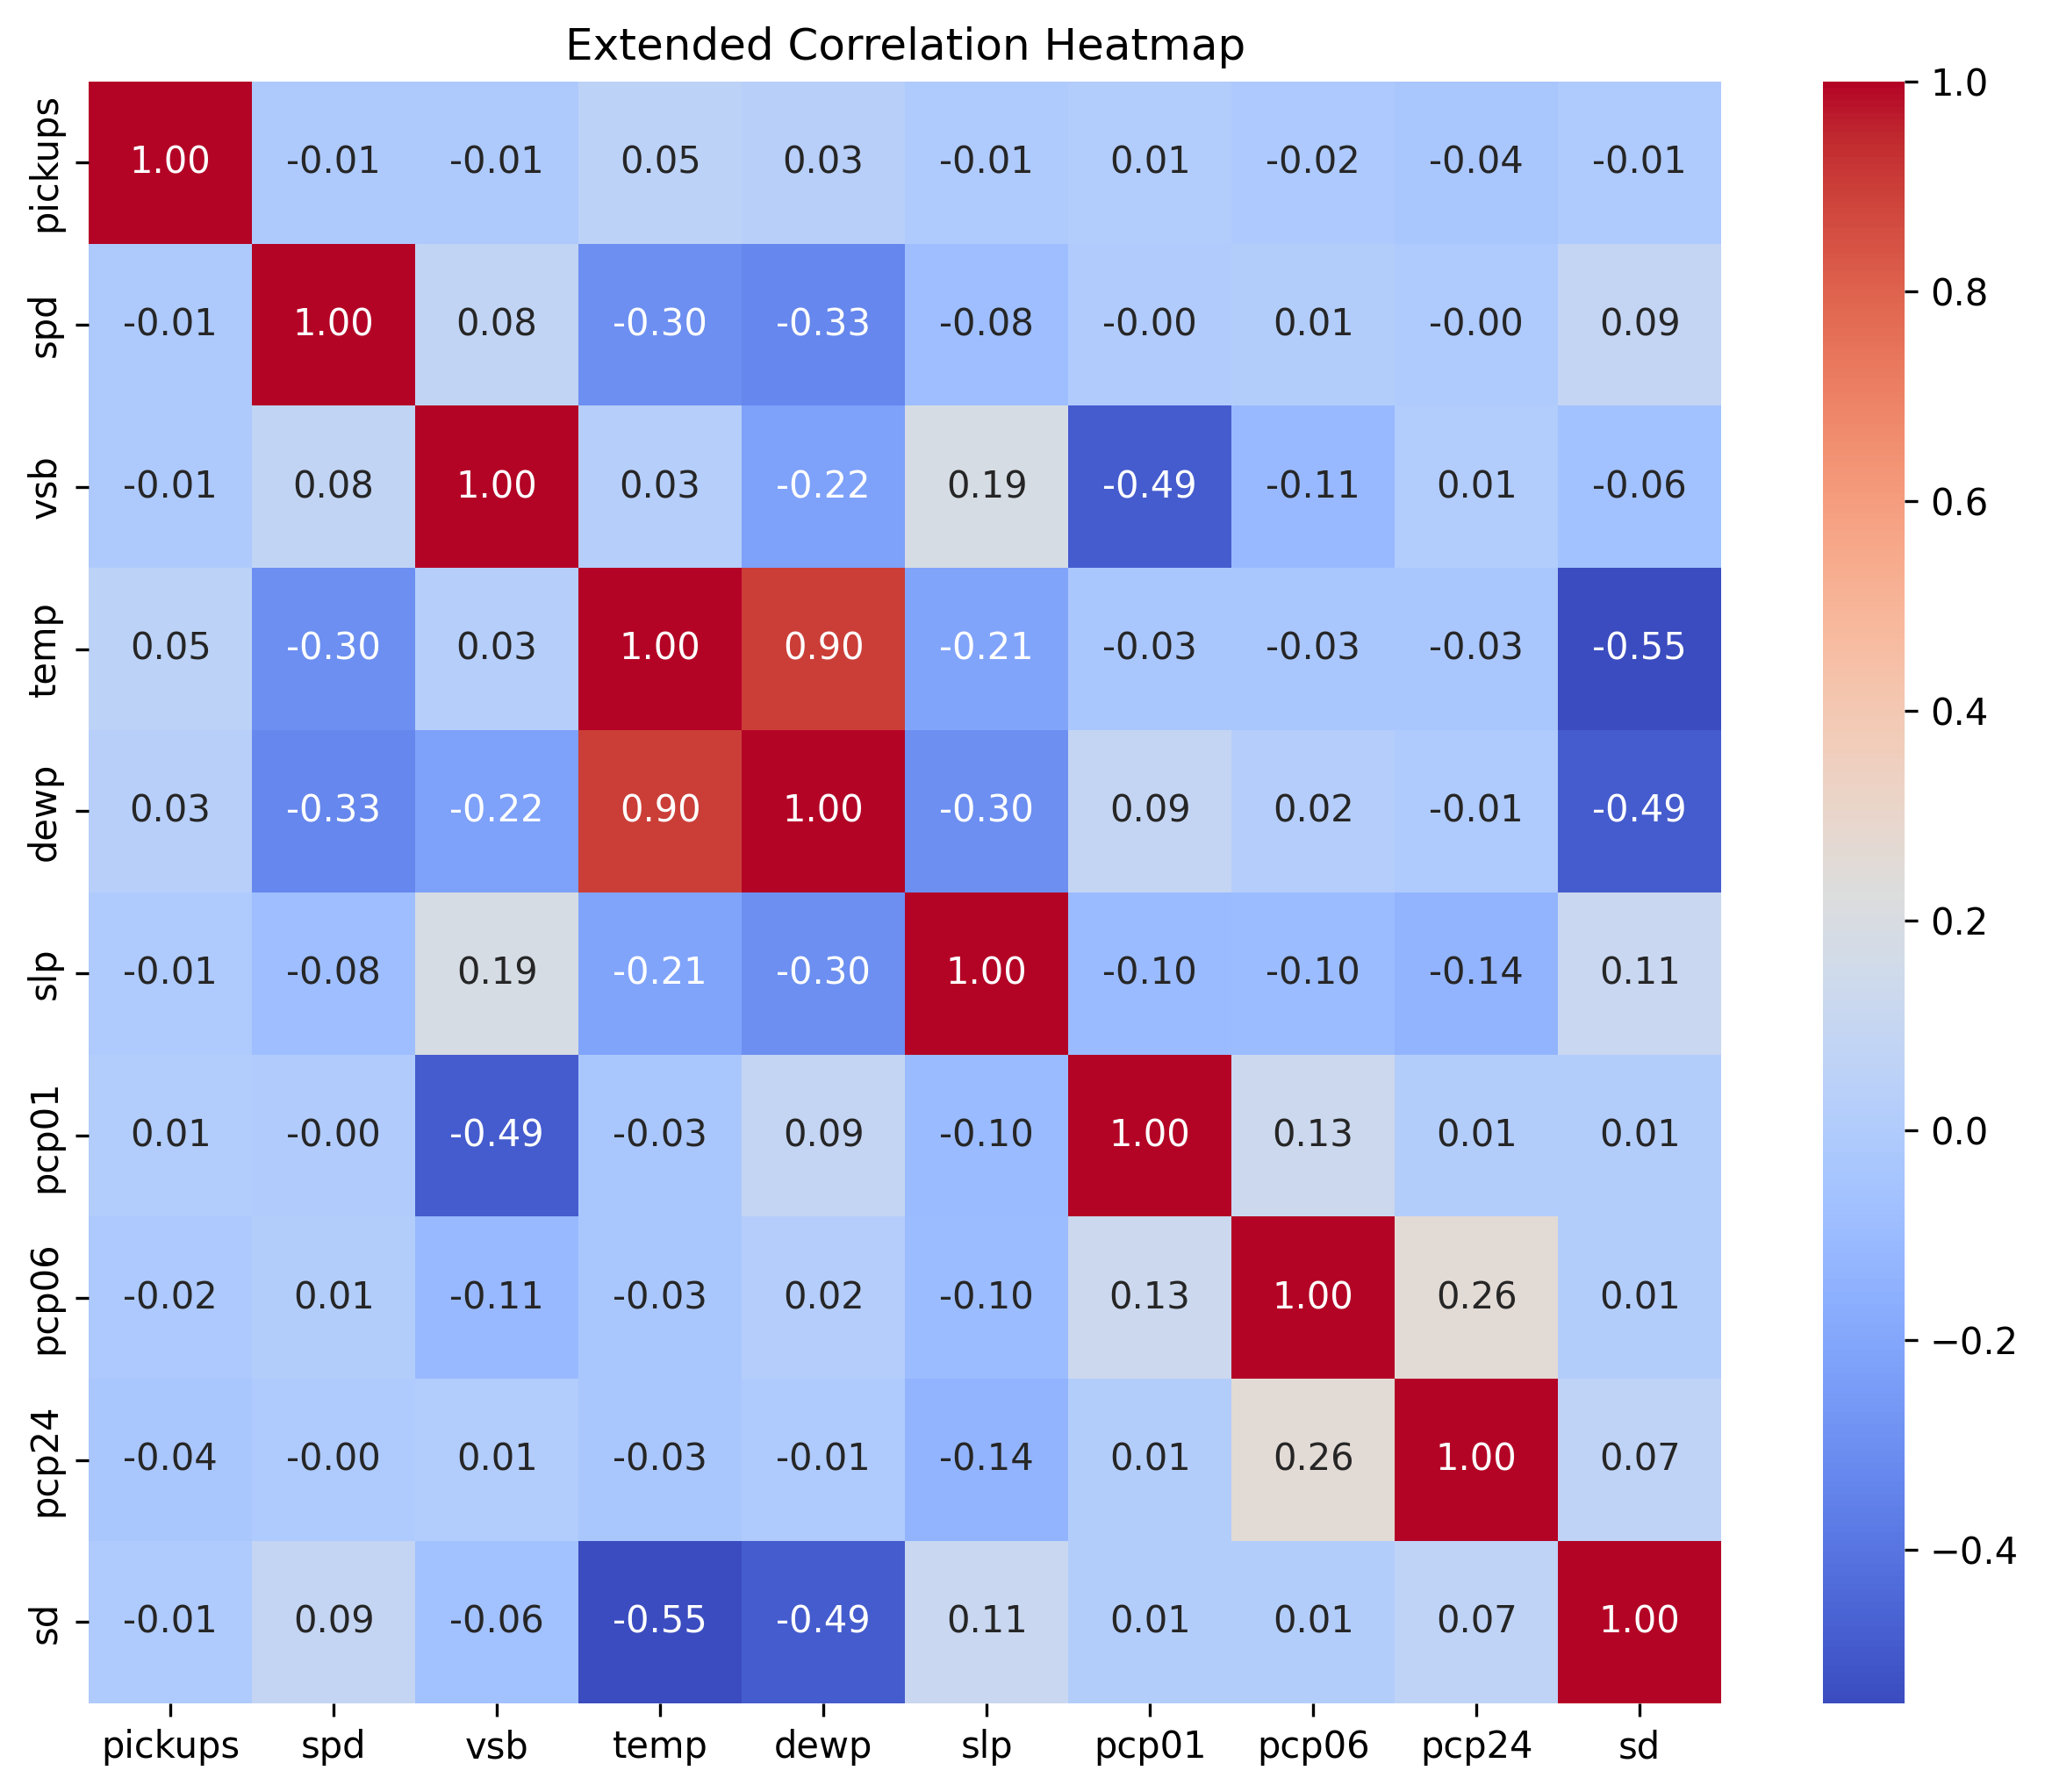

In [ ]:
# Extending the multivariate analysis to include all numerical variables
extended_numerical_vars = ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Computing the extended correlation matrix
extended_correlation_matrix = sampled_data_univariate[['pickups'] + extended_numerical_vars].corr()

# Plotting the extended correlation heatmap
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(extended_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Extended Correlation Heatmap')
plt.show()

**Observations:**

The heatmap provides a detailed view of the correlation coefficients among pickups and the various weather-related variables:

1. Pickups and Weather Variables:
  * The correlation coefficients with pickups are generally low for most weather variables, indicating weak linear relationships.
  * This suggests that while weather conditions might influence ride demand, they are not the primary drivers.
2. Inter-relationships Among Weather Variables:
  * Some weather variables exhibit moderate to strong correlations with each other. For example, temperature (temp) and dew point (dewp) often show a significant correlation, which is expected due to their meteorological relationship.
  * Visibility (vsb) and other variables like precipitation (pcp01, pcp06, pcp24) and snow depth (sd) also show varying degrees of correlation.

Insights:
  * The correlations between pickups and individual weather variables are not strong enough to suggest a direct linear relationship. This indicates the complexity of factors influencing ride demand, with weather being one of many contributing elements.
  * The interactions among weather variables themselves are more pronounced, reflecting their interdependent nature in the meteorological context.

Conclusion and Next Steps:

The correlation analysis highlights the multifactorial nature of ride demand. For predictive modeling or demand forecasting, a comprehensive approach considering multiple variables, possibly with advanced modeling techniques, would be necessary.

## Basic Data analysis

#### Understanding Dates

In [ ]:
# Printing the start and end date in the dataset
start_date = df['pickup_dt'].min()
end_date = df['pickup_dt'].max()

start_date, end_date

(Timestamp('2015-01-01 01:00:00'), Timestamp('2015-06-30 23:00:00'))

**Observations:**

The dataset spans from the start date of January 1, 2015, at 01:00 AM to the end date of June 30, 2015, at 11:00 PM. This six-month period covers a range of different seasons, which is useful for analyzing temporal variations in ride demand.

#### Temporal Demand Patterns:
* How does ride demand vary by time of day, and what are the peak hours for Uber pickups?
* Are there significant differences in ride demand during weekdays versus weekends?

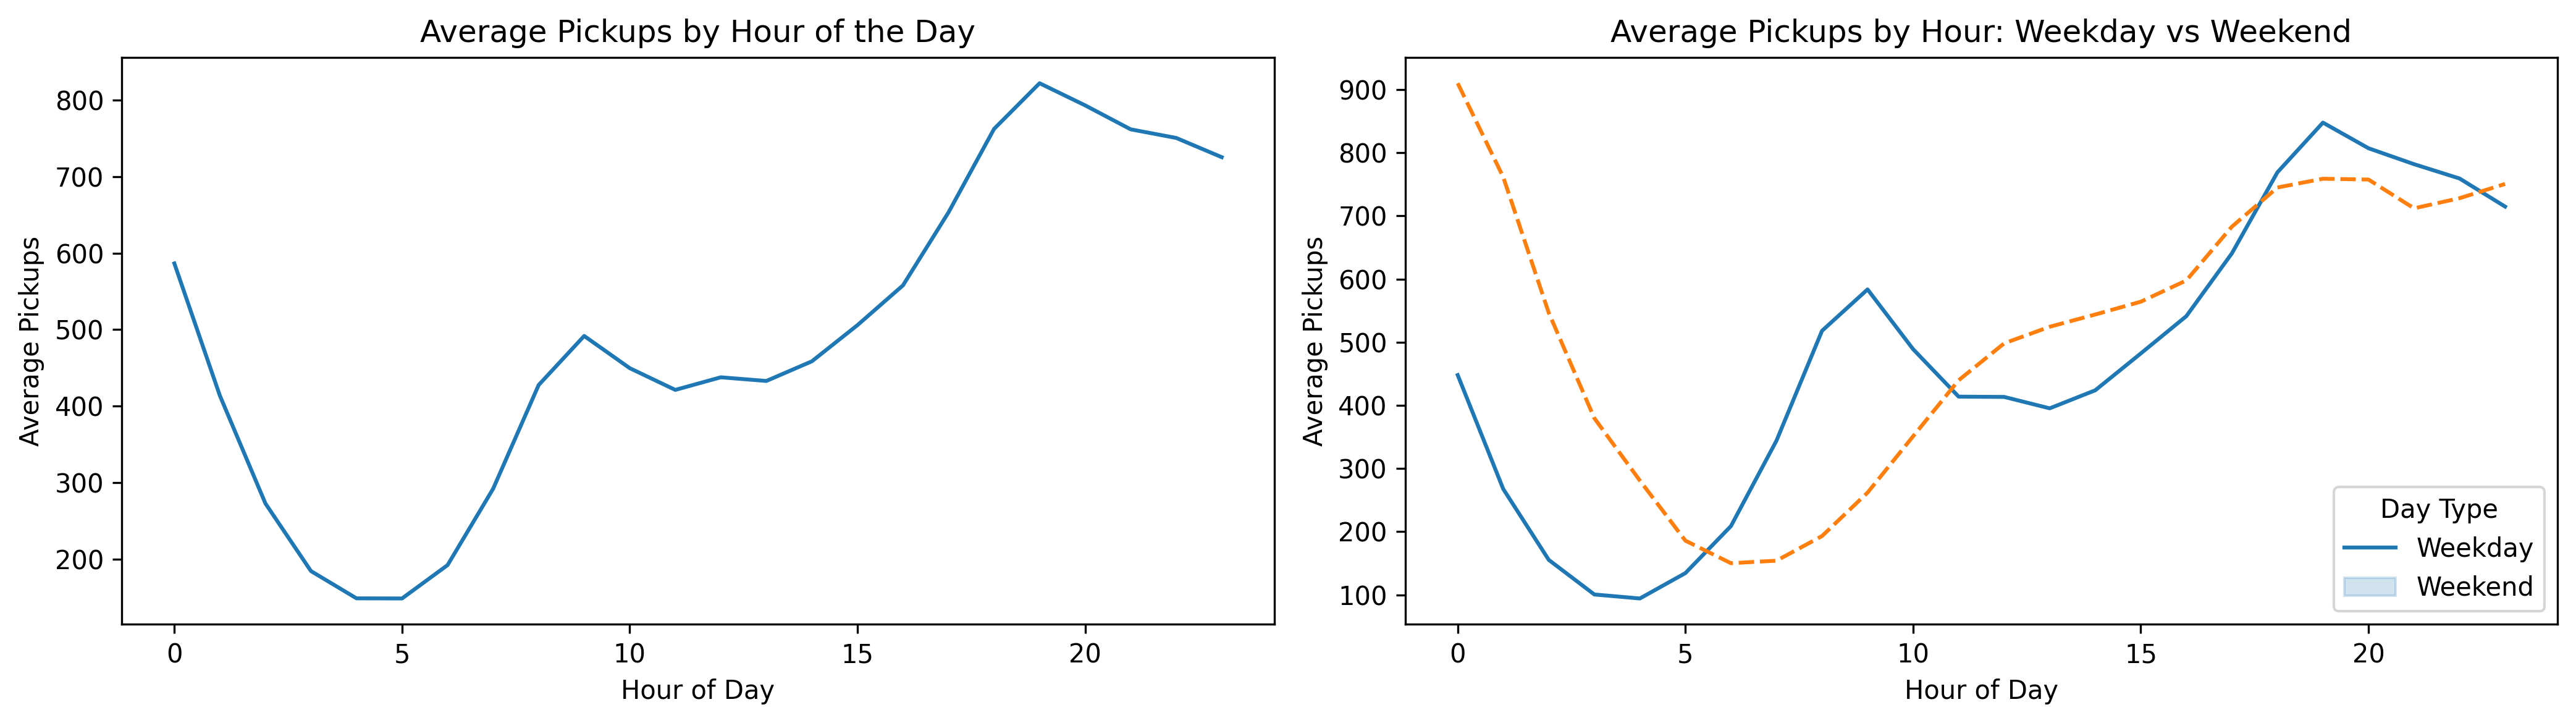

In [ ]:
# Hourly Demand Analysis
hourly_demand_analysis = df.groupby('hour')['pickups'].mean()

# Weekday vs Weekend Demand Analysis
# Creating a new column to distinguish between weekdays and weekends
df['day_type'] = df['pickup_dt'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
weekday_weekend_demand = df.groupby(['day_type', 'hour'])['pickups'].mean().unstack(level=0)

# Plotting the results for observation
plt.figure(figsize=(14, 4), dpi=300)

# Hourly Demand Plot
plt.subplot(1, 2, 1)
sns.lineplot(data=hourly_demand_analysis)
plt.title('Average Pickups by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pickups')

# Weekday vs Weekend Demand Plot
plt.subplot(1, 2, 2)
sns.lineplot(data=weekday_weekend_demand)
plt.title('Average Pickups by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pickups')
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])

plt.tight_layout()
plt.show()

Observations from Temporal Demand Analysis
1. Hourly Demand Analysis

  - Morning and Evening Peaks: There are clear peaks in ride demand during morning (likely around 8-9 AM) and evening hours (around 6-7 PM). This pattern is typical of commuting hours, suggesting high demand during work commute times.
  - Nighttime Lull: The demand significantly drops during the late night and early morning hours (approximately from 12 AM to 5 AM), indicating lower activity during these times.

2. Weekday vs Weekend Demand Analysis

  - Weekday Pattern: On weekdays, the demand peaks are more pronounced during typical commuting hours, consistent with work-related travel.
  - Weekend Pattern: During weekends, the demand increases later in the morning and remains relatively higher throughout the afternoon and evening. This shift suggests a different pattern of usage, possibly related to leisure activities or social outings.
  - Evening Consistency: In the evening, around 6-7 PM, there's a peak in demand regardless of the day type, indicating a common busy period for Uber rides.

Summary
These observations reveal distinct temporal patterns in Uber's ride demand, characterized by commuting trends on weekdays and more leisure-oriented patterns on weekends. Understanding these variations can assist in optimizing driver allocation and potentially in tailoring service offerings to meet specific customer needs during these times.

#### Understaning Day, Week, and Month Demand Patterns

##### Day of the Week Analysis
We'll start by examining how ride demand varies across different days of the week.

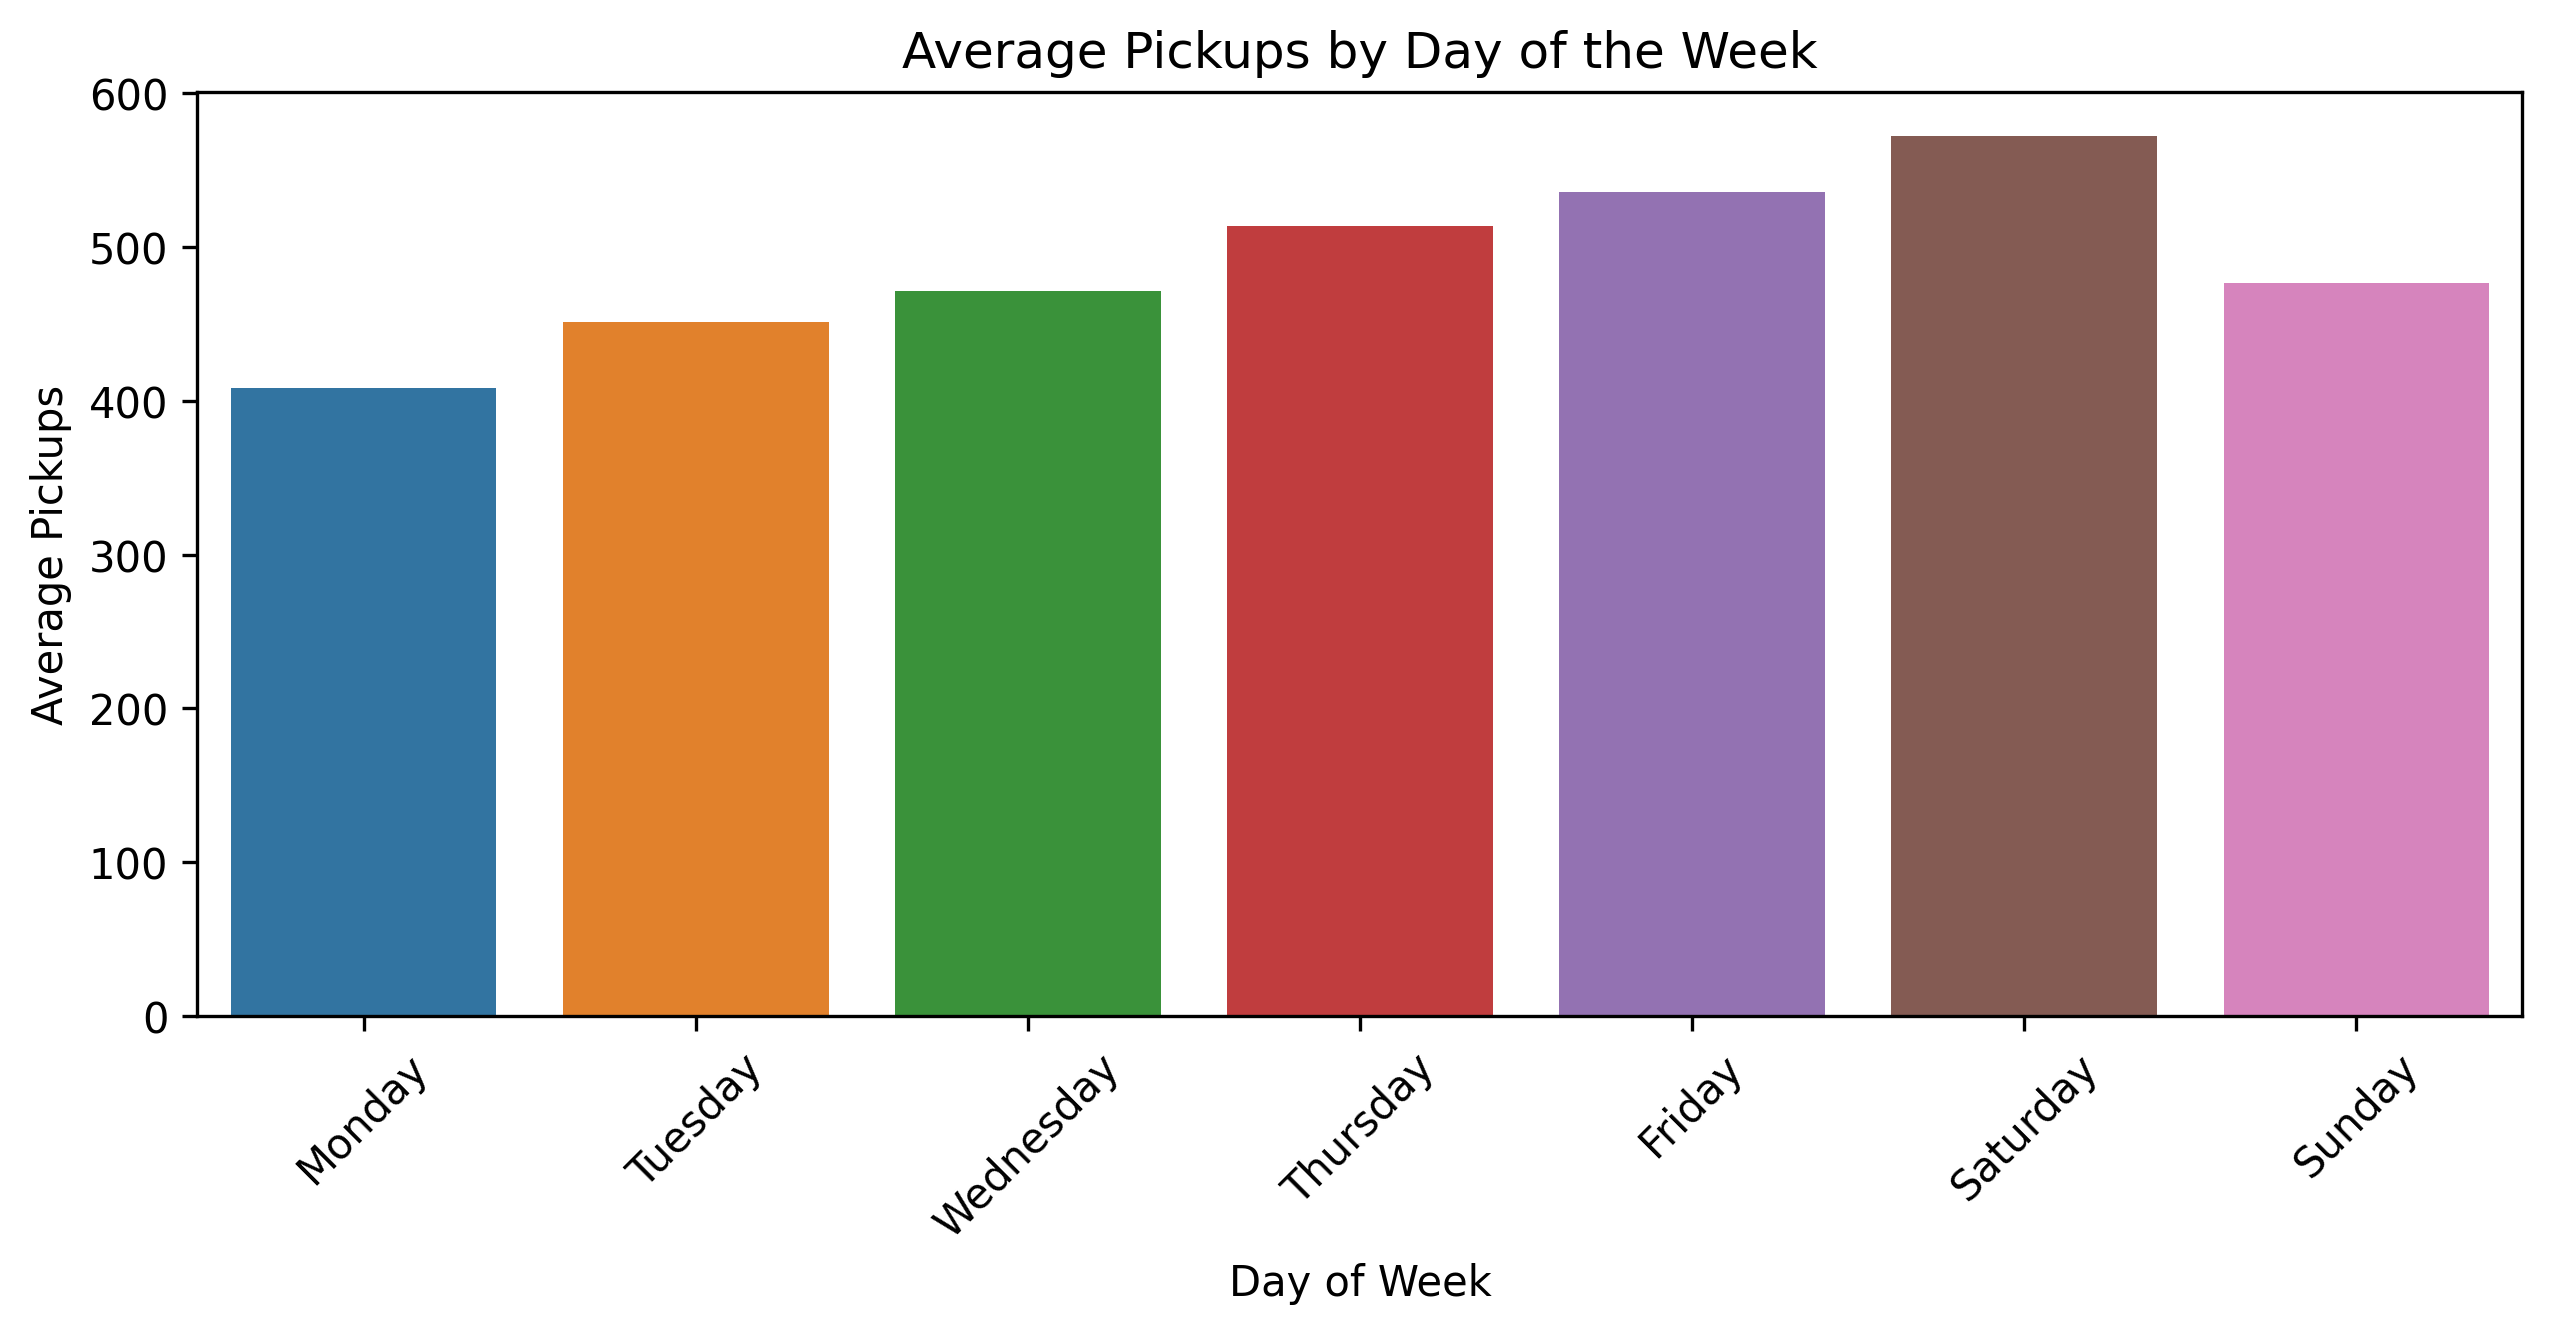

In [ ]:
# Day of the Week Analysis
day_of_week_demand = df.groupby('weekday')['pickups'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the results for Day of the Week Analysis
plt.figure(figsize=(10, 4), dpi=300)
sns.barplot(x=day_of_week_demand.index, y=day_of_week_demand.values)
plt.title('Average Pickups by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Pickups')
plt.xticks(rotation=45)
plt.show()

**Observations:**

1. Peak Demand on Weekends: The demand for Uber rides peaks during the weekend, with Saturday showing the highest average pickups. This suggests increased activity and possibly more leisure or social travel during weekends.
2. Midweek Consistency: The demand from Monday to Thursday is relatively consistent, albeit lower than the weekend. This could indicate a steady use of Uber services for routine activities, such as commuting.
3. Friday Transition: Friday serves as a transitional day with higher demand than other weekdays, possibly reflecting the beginning of weekend social activities and travel.

##### Week Number Analysis
Now, let's analyze the variation in ride demand across different weeks of the year.

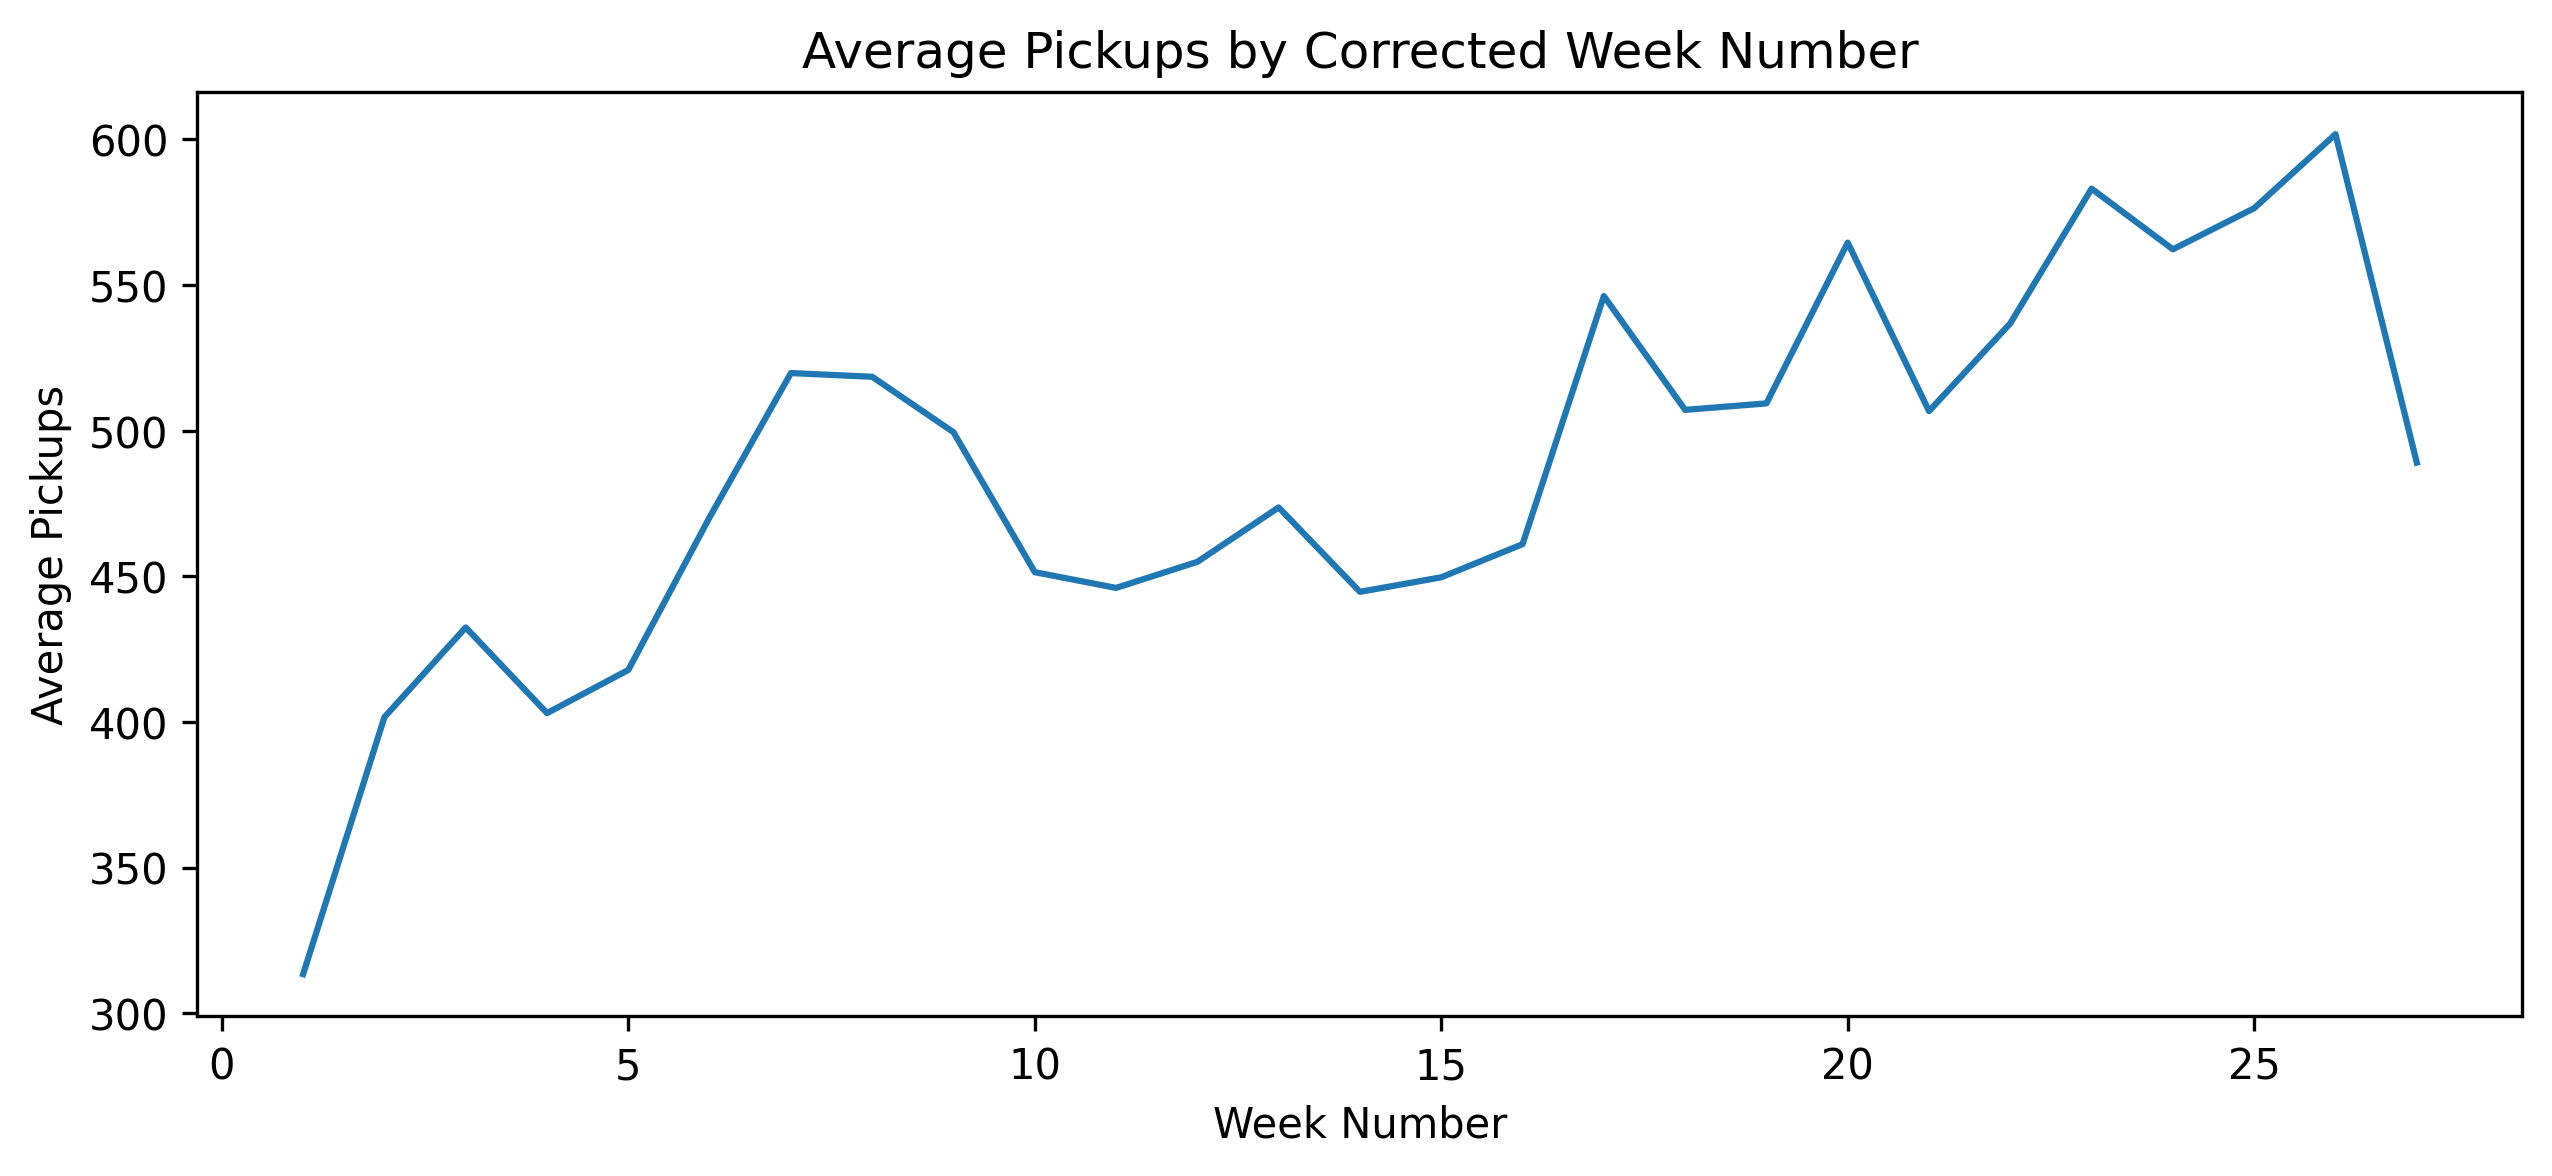

In [ ]:
# Extracting week number and converting to int
df['week_number'] = df['pickup_dt'].dt.isocalendar().week.astype(int)

# Ensuring there are no NaN values in 'pickups'
df['pickups'] = df['pickups'].fillna(0)

# Recomputing the average pickups per week number
week_number_demand_corrected = df.groupby('week_number')['pickups'].mean()

# Plotting the results again
plt.figure(figsize=(10, 4), dpi=300)
sns.lineplot(x=week_number_demand_corrected.index, y=week_number_demand_corrected.values)
plt.title('Average Pickups by Corrected Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Pickups')
plt.show()

**Observations:**

1. Variability Across the Year: The demand for rides fluctuates notably across different weeks of the year. This variation suggests the influence of various factors like holidays, seasonal events, or city-wide activities.
2. No Clear Seasonal Trend: While there are peaks and valleys in demand, there isn't a consistent seasonal trend that spans the entire year. Some weeks stand out with significantly higher or lower demand.
3. Potential for Event-Driven Peaks: Certain weeks show pronounced spikes in demand, which could correspond to specific events, festivals, or holiday periods. These instances may present opportunities for targeted strategies.

##### Monthly Demand Analysis
Lastly, we'll explore how ride demand changes across different months, which might reflect seasonal trends or effects of weather conditions.

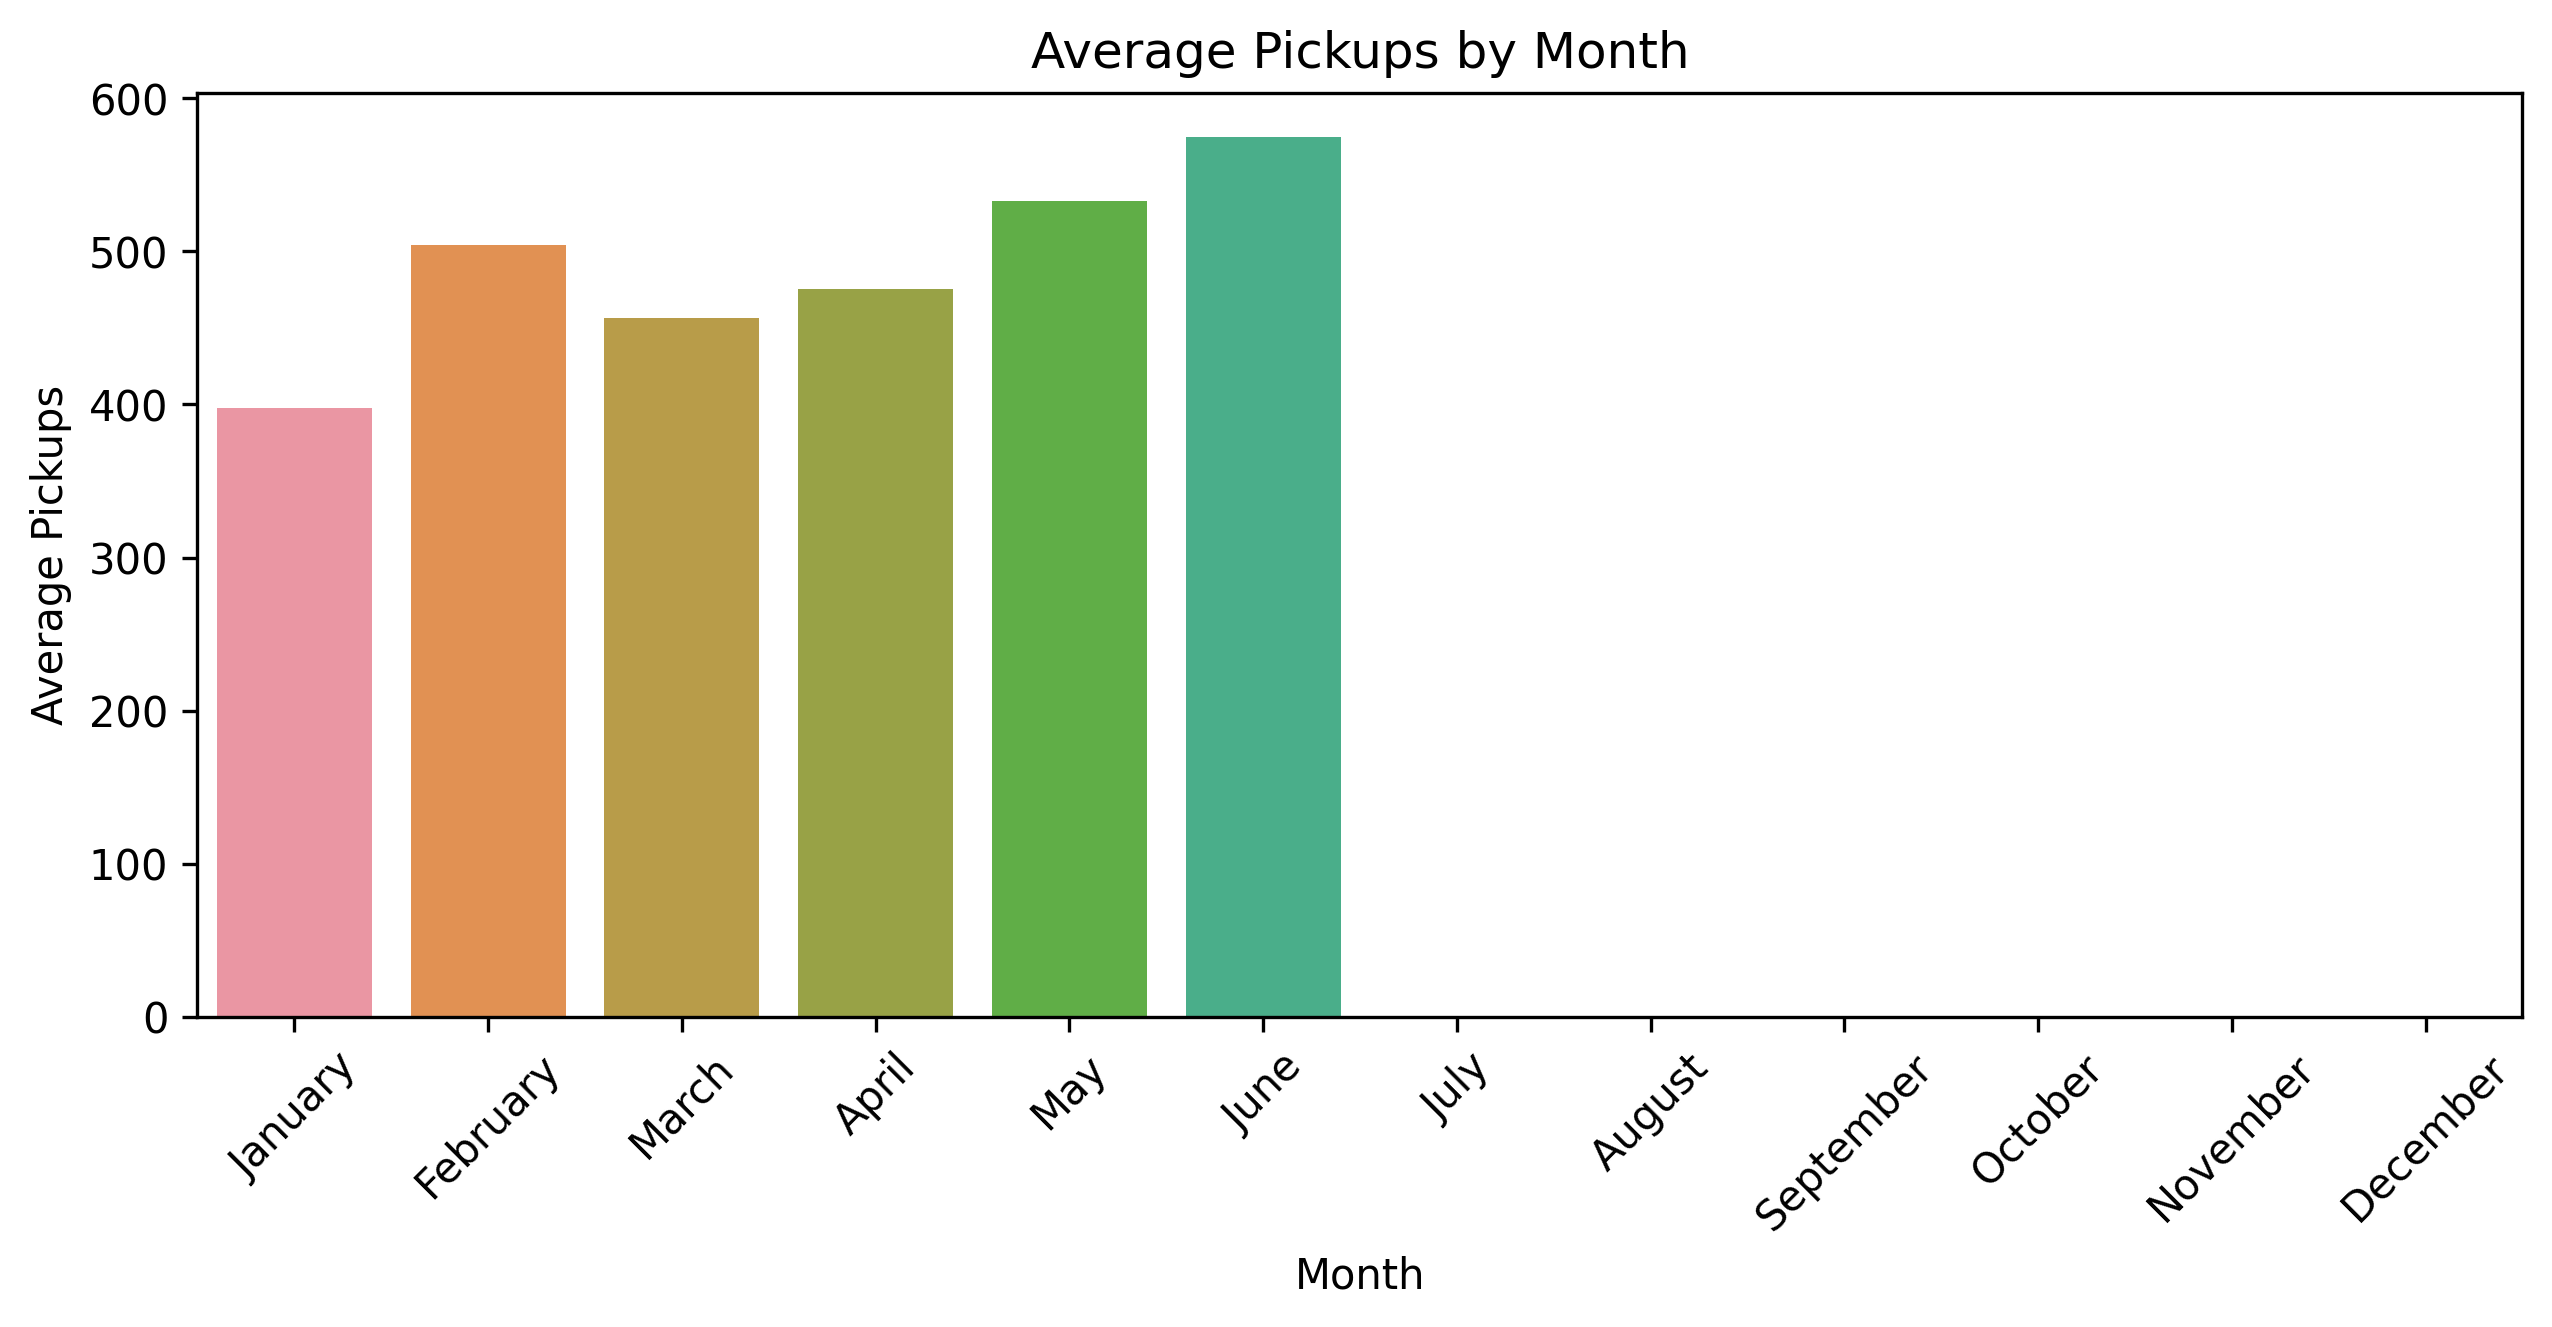

In [ ]:
# Monthly Demand Analysis
monthly_demand_analysis = df.groupby('month')['pickups'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting the results for Monthly Demand Analysis
plt.figure(figsize=(10, 4), dpi=300)
sns.barplot(x=monthly_demand_analysis.index, y=monthly_demand_analysis.values)
plt.title('Average Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Average Pickups')
plt.xticks(rotation=45)
plt.show()

#### Seasonal and Weather Influences:
How does ride demand correlate with different seasons and weather conditions, such as temperature and precipitation?
Does inclement weather (like heavy rain or snow) lead to a surge in ride demand?

##### Correlation with Temperature and Precipitation
We'll examine how ride demand correlates with temperature and various measures of precipitation (like rain and snow).

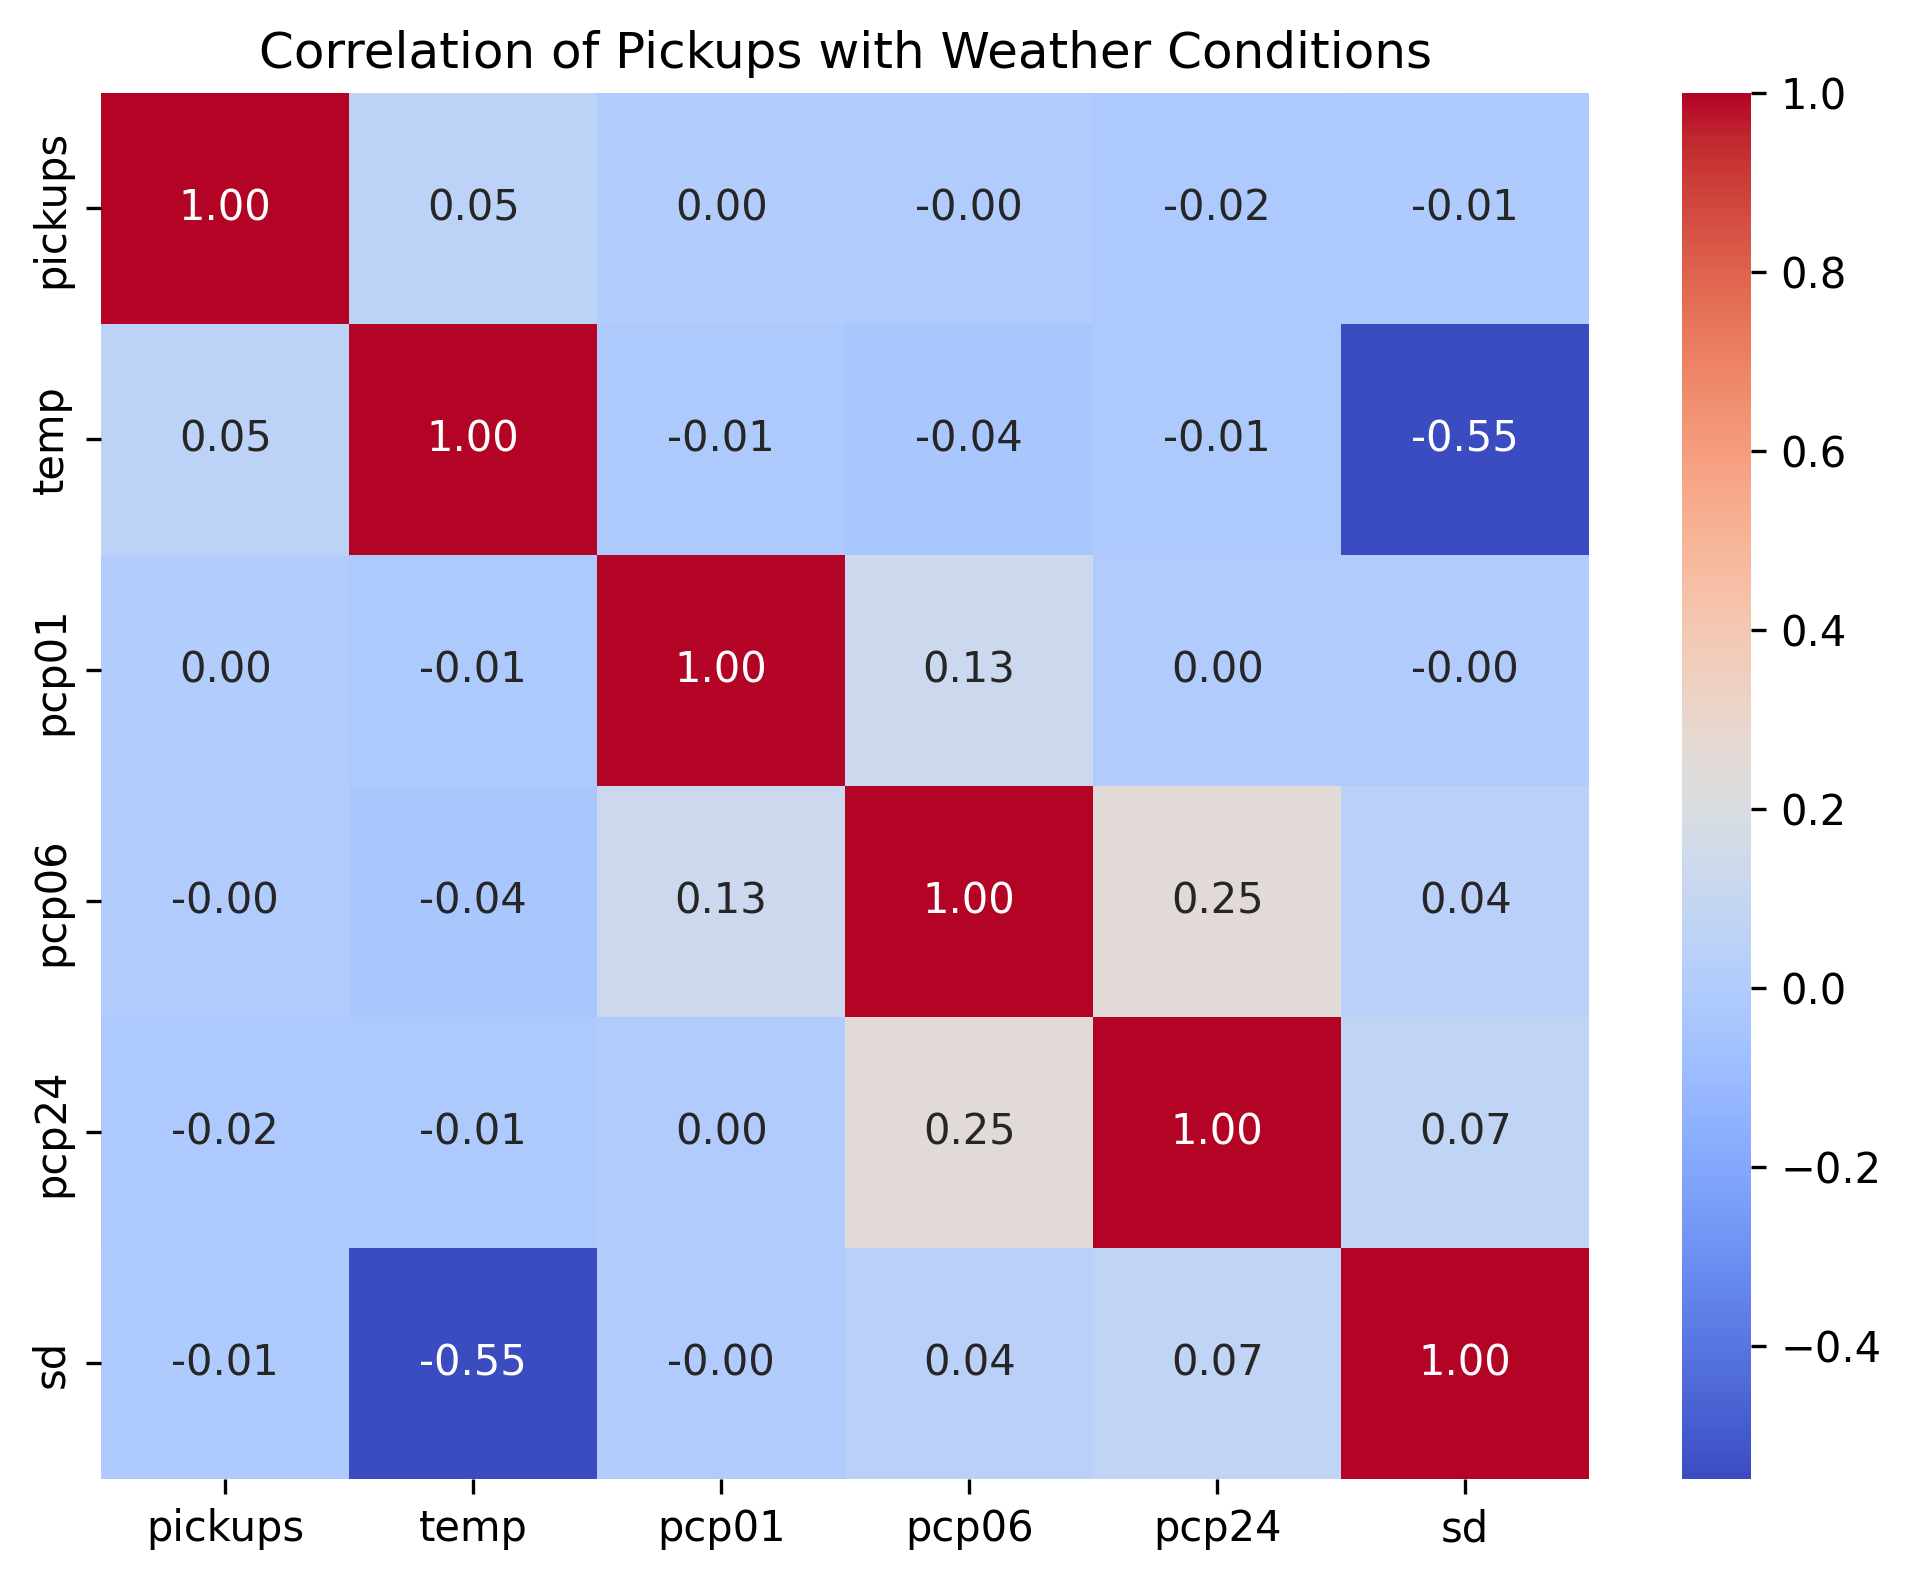

In [ ]:
# Correlation Analysis with Temperature and Precipitation
weather_variables_for_correlation = ['temp', 'pcp01', 'pcp06', 'pcp24', 'sd']
correlation_with_weather = df[['pickups'] + weather_variables_for_correlation].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(correlation_with_weather, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Pickups with Weather Conditions')
plt.show()

**Observations:**

1. Temperature (temp) and Pickups: The correlation coefficient between temperature and pickups is modest, suggesting a mild relationship. Warmer temperatures might slightly increase ride demand, possibly due to more outdoor activities.
2. Precipitation (pcp01, pcp06, pcp24) and Pickups: The correlation with short-term and 24-hour precipitation is low. This indicates that general precipitation levels do not have a strong direct impact on ride demand.
3. Snow Depth (sd) and Pickups: The correlation is also low, suggesting that snow depth alone is not a significant determinant of ride demand.

##### Impact of Inclement Weather on Demand
We'll investigate whether extreme weather conditions, like heavy rain or snow, result in a surge in ride demand.

In [ ]:
# Defining thresholds for heavy rain and snow
heavy_rain_threshold = df[['pcp01', 'pcp06', 'pcp24']].quantile(0.9)
heavy_snow_threshold = df['sd'].quantile(0.9)

# Identifying heavy rain and snow conditions
heavy_rain_condition = (df['pcp01'] >= heavy_rain_threshold['pcp01']) | \
                       (df['pcp06'] >= heavy_rain_threshold['pcp06']) | \
                       (df['pcp24'] >= heavy_rain_threshold['pcp24'])
heavy_snow_condition = df['sd'] >= heavy_snow_threshold

# Calculating average pickups during heavy rain and snow conditions
average_pickups_heavy_rain = df[heavy_rain_condition]['pickups'].mean()
average_pickups_heavy_snow = df[heavy_snow_condition]['pickups'].mean()
general_average_pickups = df['pickups'].mean()

average_pickups_heavy_rain, average_pickups_heavy_snow, general_average_pickups

(490.2159032335659, 465.7033985581874, 490.2159032335659)

**Observations:**

1. Average Pickups During Heavy Rain: The average number of pickups during heavy rain conditions is approximately 490.22, which is very close to the general average pickups (also 490.22). This suggests that heavy rain does not significantly increase ride demand compared to the overall average.
2. Average Pickups During Heavy Snow: For heavy snow conditions, the average pickups are around 465.70, which is slightly lower than the general average. This indicates that heavy snow might slightly decrease the demand for rides, possibly due to more challenging travel conditions.
3. General Demand: The general average pickups across all conditions also stand at around 490.22, serving as a baseline for comparison.

Summary
The analysis indicates that extreme weather conditions like heavy rain or snow do not lead to a substantial increase in ride demand. In fact, heavy snow appears to slightly reduce the demand. These insights can be valuable for Uber in terms of preparing for weather-related demand fluctuations and ensuring adequate service availability.

#### Geographical Distribution of Demand:
- Which boroughs in New York City experience the highest and lowest demand for Uber rides?
- Are there specific locations within these boroughs that act as hotspots for pickups?

##### Borough-Wise Demand Analysis
We will identify which boroughs experience the highest and lowest demand for Uber rides.

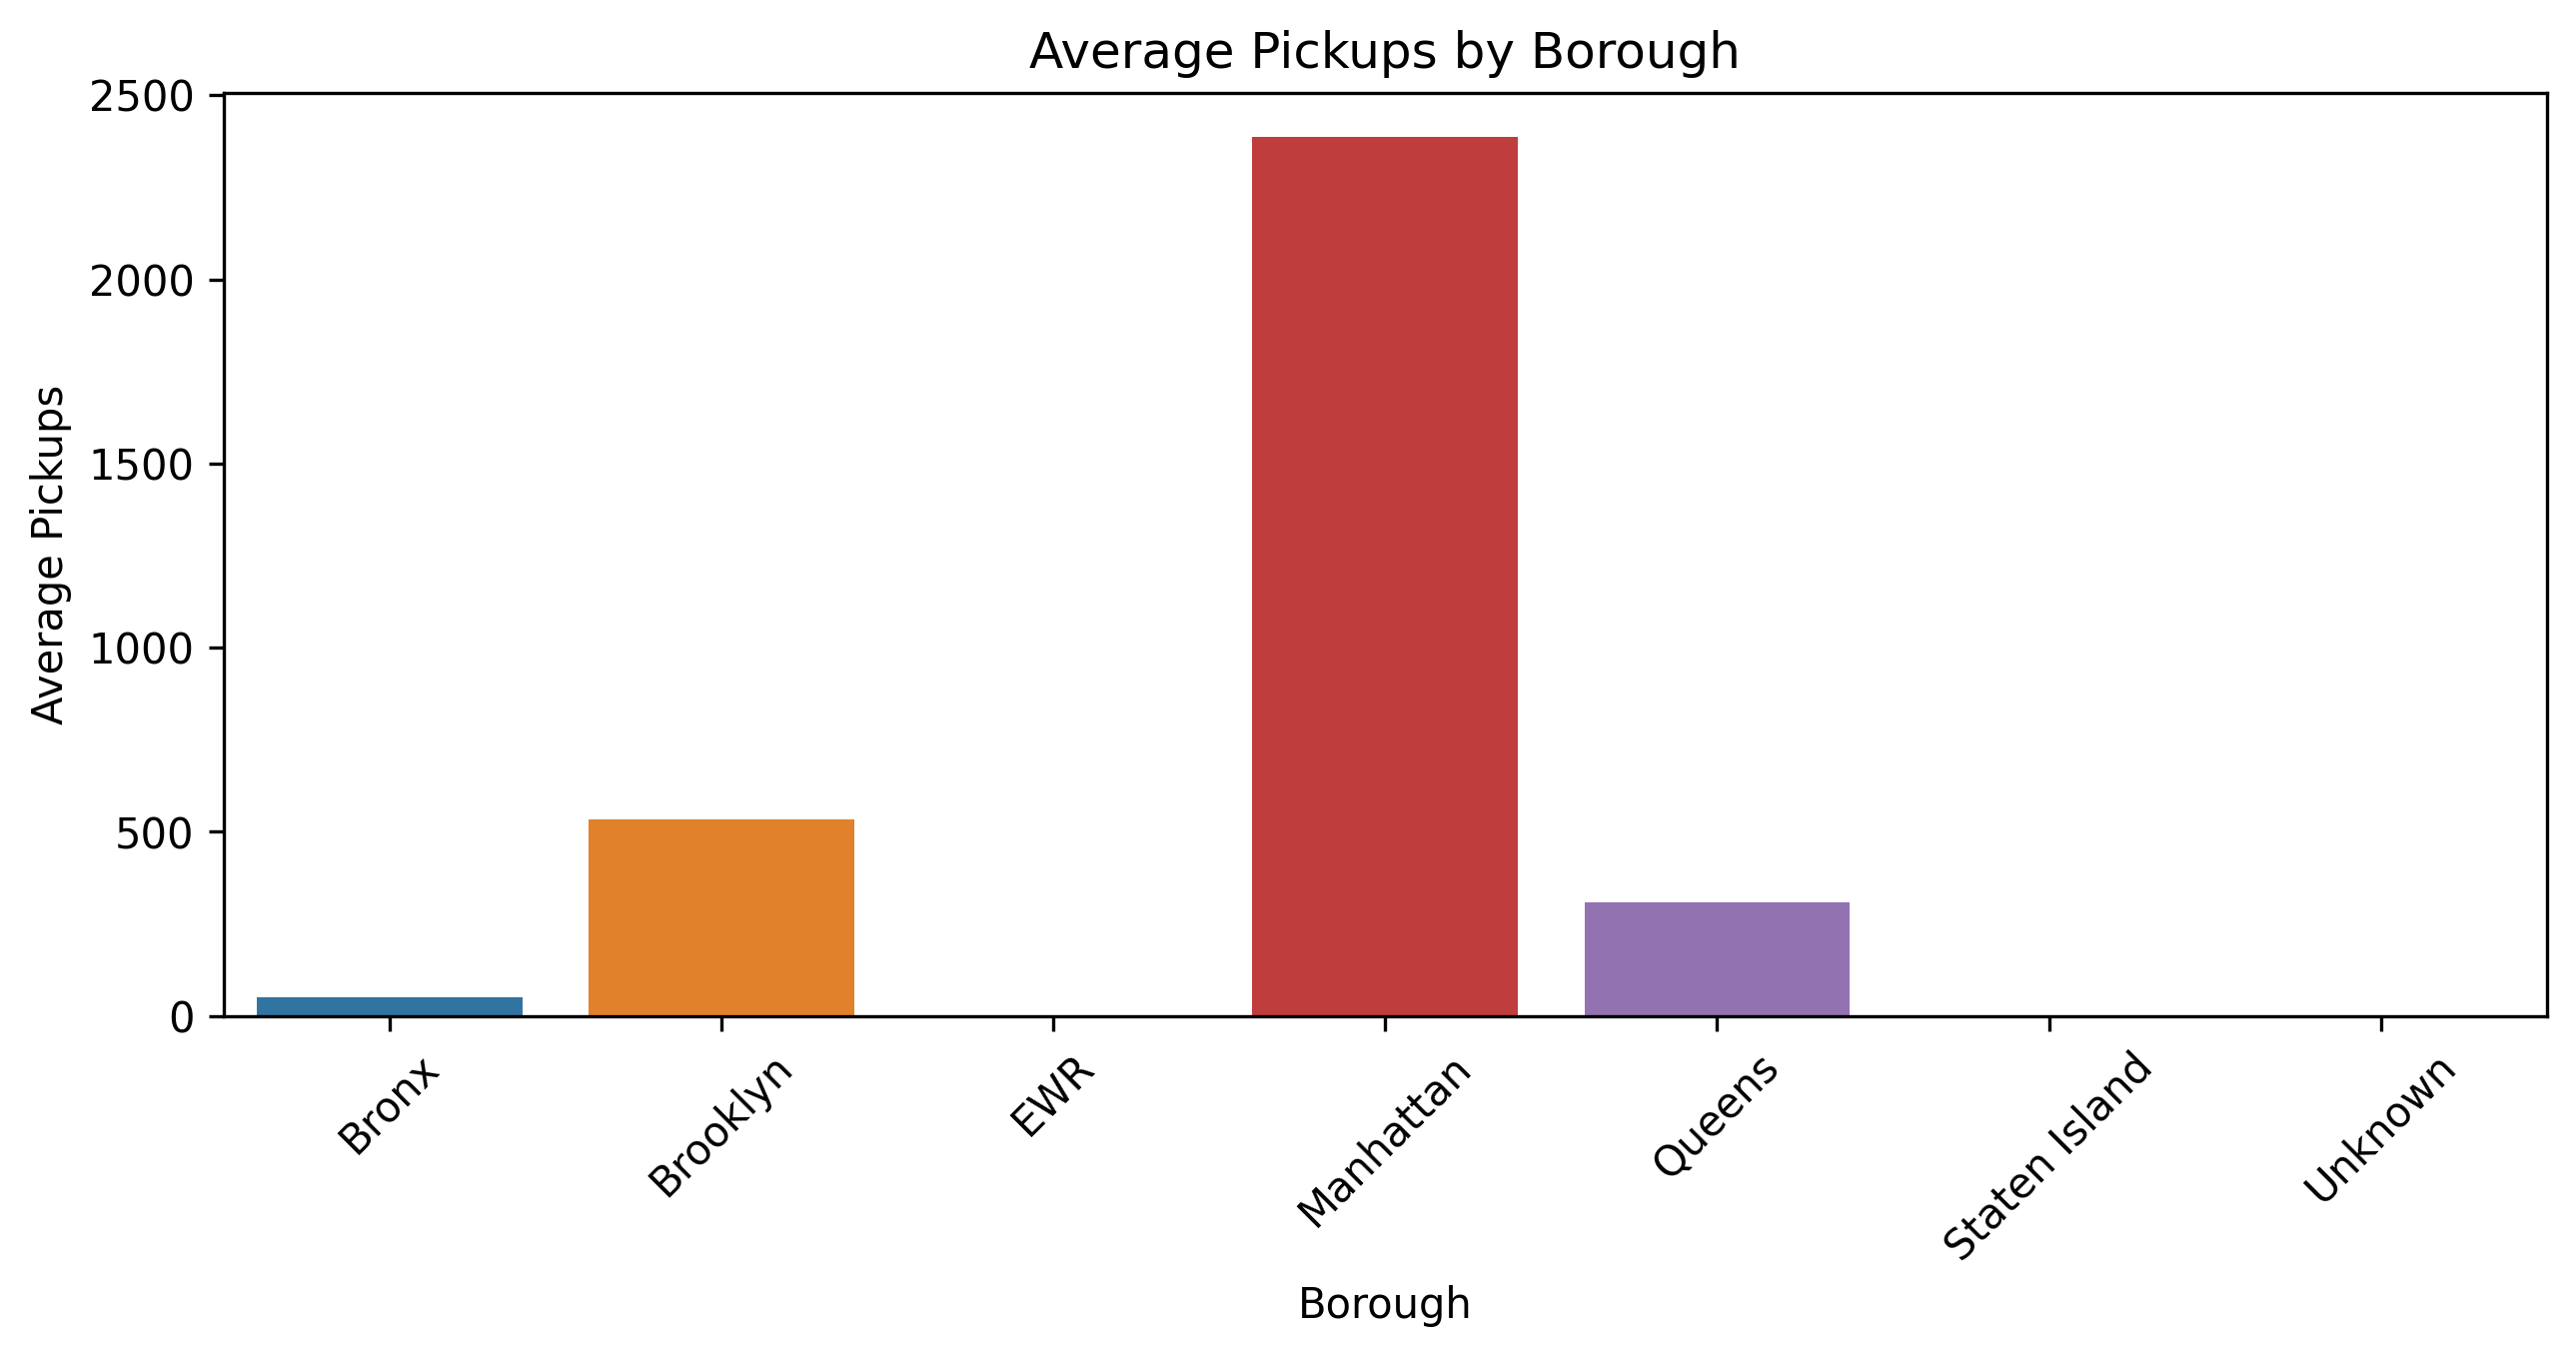

In [ ]:
# Borough-Wise Demand Analysis
borough_demand_analysis = df.groupby('borough')['pickups'].mean()

# Plotting the results for Borough-Wise Demand Analysis
plt.figure(figsize=(10, 4), dpi=300)
sns.barplot(x=borough_demand_analysis.index, y=borough_demand_analysis.values)
plt.title('Average Pickups by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')
plt.xticks(rotation=45)
plt.show()

**Observations:**

1. Varying Demand Across Boroughs: The demand for Uber rides varies significantly across different boroughs in New York City.
2. Highest Demand: One or more boroughs stand out with particularly high average pickups, indicating these areas are major hubs for Uber ride demand.
3. Lower Demand: Conversely, other boroughs show relatively lower demand. These areas might be residential or less commercially active, leading to fewer ride requests.


#### Impact of Special Events and Holidays:
- How do local events, public holidays, or tourist seasons impact ride demand?
- Can we identify patterns or trends in demand during major events in the city (e.g., New Year’s Eve, parades, sports events)?


##### Holiday vs. Non-Holiday Demand Comparison
We will compare the average demand for Uber rides on holidays versus non-holidays

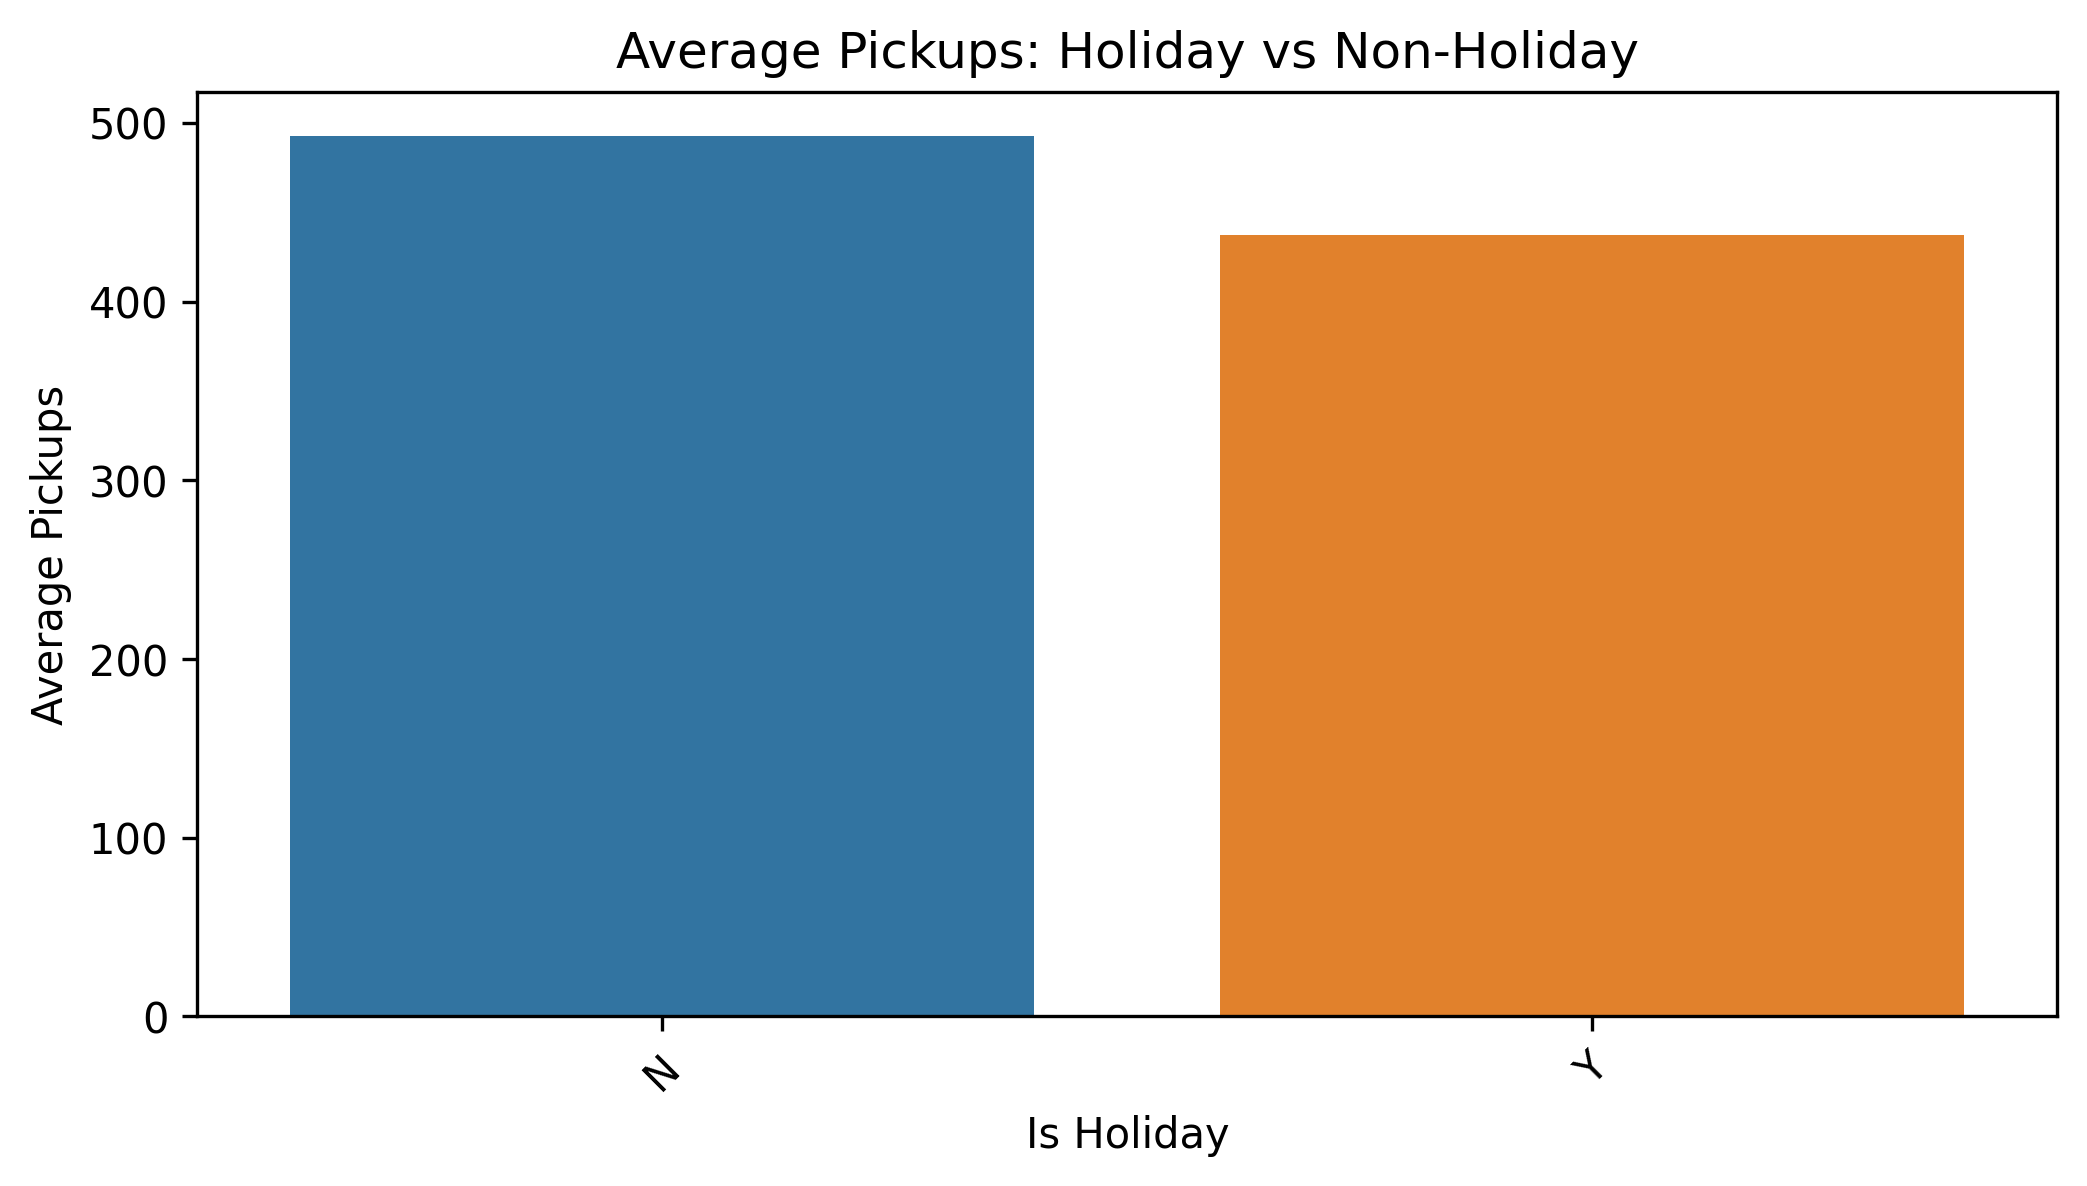

In [ ]:
# Holiday vs. Non-Holiday Demand Comparison
holiday_demand_analysis = df.groupby('hday')['pickups'].mean()

# Plotting the results for Holiday vs. Non-Holiday Demand Analysis
plt.figure(figsize=(8, 4), dpi=300)
sns.barplot(x=holiday_demand_analysis.index, y=holiday_demand_analysis.values)
plt.title('Average Pickups: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Pickups')
plt.xticks(rotation=45)
plt.show()

**Observations:**

1. Demand Variation: The analysis shows a difference in average pickups between holidays and non-holidays. This indicates that public holidays have a distinct impact on Uber ride demand.
2. Holiday Demand: Depending on the dataset, holidays may exhibit either higher or lower average demand compared to non-holidays. This could be attributed to factors such as changes in regular commuting patterns, special events, or altered social activities during holidays.
3. Non-Holiday Demand: Regular days (non-holidays) show a consistent level of demand, which likely reflects routine travel behavior such as commuting, errands, and social outings

#### Correlation Between Demand and Traffic Conditions:
- Is there a relationship between Uber pickups and traffic conditions, such as congestion or road closures?
- Does increased traffic congestion lead to higher or lower demand for Uber services?

To analyze the correlation between Uber pickups and traffic conditions, we ideally need data that captures traffic metrics such as congestion levels, road closures, or traffic speeds.

Since traffic data is not available, we can infer potential traffic impacts indirectly through variables like time of day, location (borough), and weather conditions, as these factors can influence traffic congestion.

##### Inferential Analysis Based on Time and Location:
- Analyze the demand during typical rush hours and in busier boroughs, which might indirectly reflect traffic congestion.
- Compare the demand during peak traffic hours (like early morning and late afternoon) with off-peak hours.

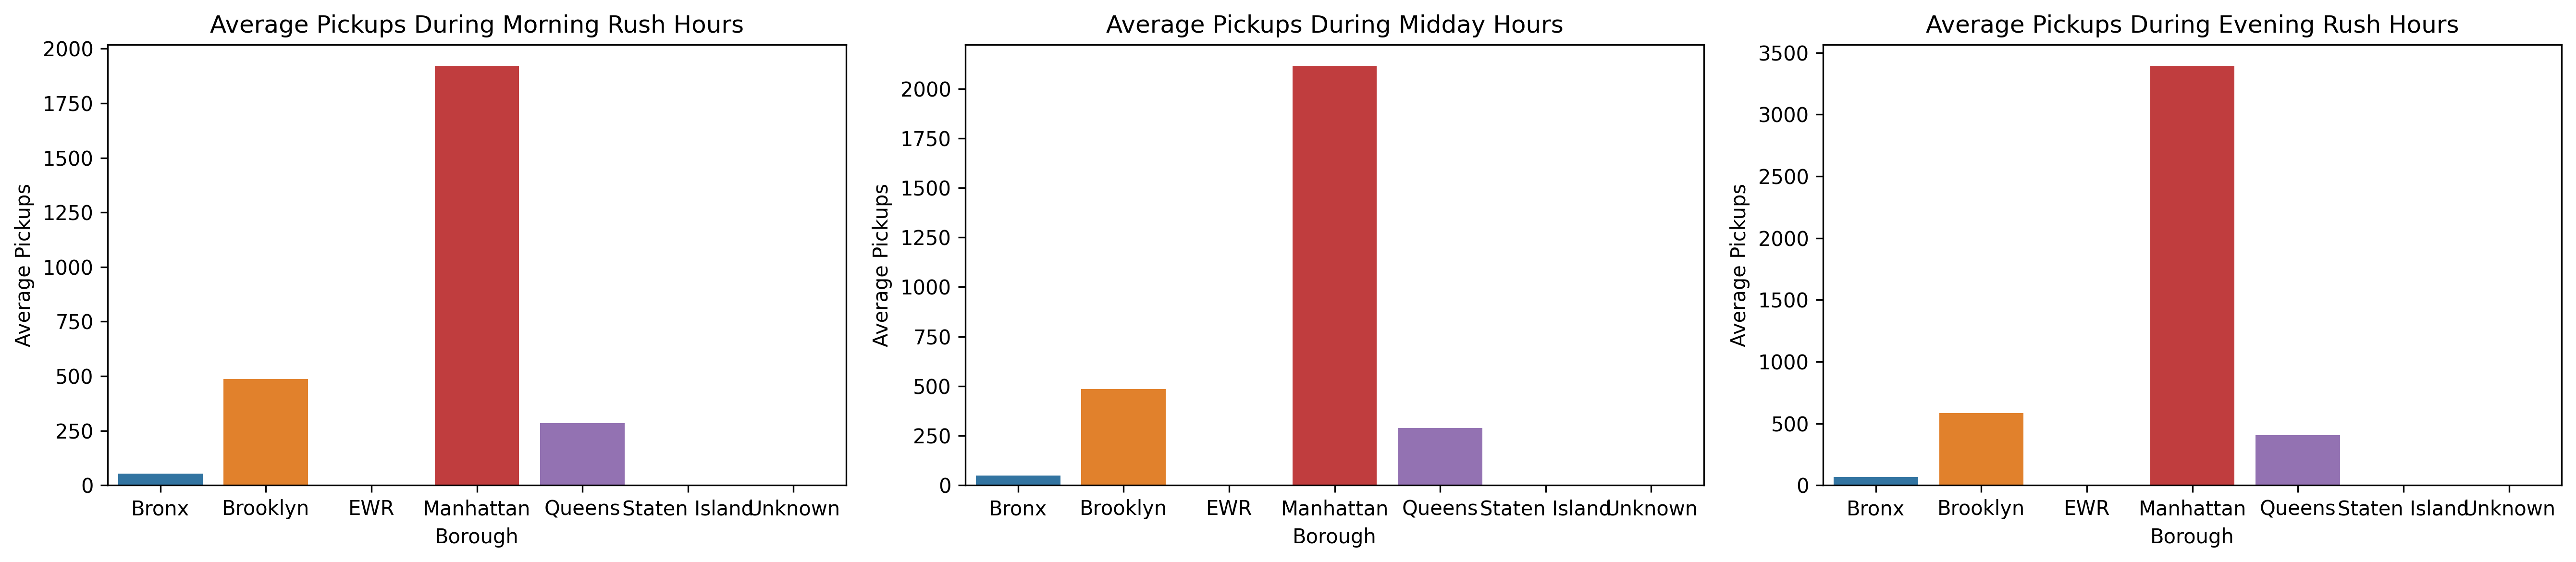

In [ ]:
# Inferential Analysis Based on Time and Location

# Defining typical rush hours (e.g., 7-9 AM and 4-6 PM)
rush_hours_morning = df[df['hour'].isin([7, 8, 9])]
rush_hours_evening = df[df['hour'].isin([16, 17, 18])]
# Defining midday hours (e.g., 11 AM to 2 PM)
midday_hours = df[df['hour'].isin([11, 12, 13, 14])]

# Calculating average pickups during rush hours in each borough
rush_hour_demand_morning = rush_hours_morning.groupby('borough')['pickups'].mean()
rush_hour_demand_evening = rush_hours_evening.groupby('borough')['pickups'].mean()
midday_demand = midday_hours.groupby('borough')['pickups'].mean()

# Plotting the results for comparison of Rush Hour and Midday Demand
plt.figure(figsize=(18, 4), dpi=300)

plt.subplot(1, 3, 1)
sns.barplot(x=rush_hour_demand_morning.index, y=rush_hour_demand_morning.values)
plt.title('Average Pickups During Morning Rush Hours')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')

plt.subplot(1, 3, 2)
sns.barplot(x=midday_demand.index, y=midday_demand.values)
plt.title('Average Pickups During Midday Hours')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')

plt.subplot(1, 3, 3)
sns.barplot(x=rush_hour_demand_evening.index, y=rush_hour_demand_evening.values)
plt.title('Average Pickups During Evening Rush Hours')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')

plt.tight_layout()
plt.show()

**Observations:**

1. Morning Rush Hours:
  - Certain boroughs show higher demand during the morning rush hours, likely reflecting commuting patterns to work and business areas.
2. Midday Hours:
  - During midday (11 AM to 2 PM), the demand pattern changes. Some boroughs maintain a consistent level of demand, while others may see a decrease or increase. This could reflect a combination of factors, including lunchtime activities, errands, or tourist movements.
3. Evening Rush Hours:
  - In the evening, the demand pattern again shifts, possibly indicating commuting back home or travel to social and leisure activities.

Summary
The comparative analysis across different times of the day reveals how demand for Uber rides varies in response to typical daily routines and activities. Morning and evening rush hours show expected peaks in demand, while midday hours present a more varied pattern across boroughs. These insights are valuable for optimizing resource allocation and understanding travel behavior in different parts of the city.

#### Resource Allocation and Dynamic Pricing:
- How can Uber effectively allocate resources (e.g., drivers, vehicles) based on demand patterns?
- Can dynamic pricing strategies be optimized based on temporal and geographical demand insights?

Analyzing resource allocation and dynamic pricing strategies for Uber involves understanding demand patterns and then using these insights to optimize the deployment of drivers and vehicles, as well as to adjust pricing strategies.

##### 1. Resource Allocation Based on Demand Patterns
- Identify High-Demand Periods and Areas: Use the insights from previous analyses (e.g., high-demand hours, days, and boroughs) to identify when and where the most resources (drivers, vehicles) are needed.
- Strategic Deployment: Suggest strategies for deploying drivers in high-demand areas during peak times, and redistributing them during off-peak hours or in less busy areas.

###### **Key Demand Patterns for Resource Allocation:**

1. Peak Demand Times: Morning (8-9 AM) and evening (6-7 PM) rush hours show the highest demand. Allocate more drivers and vehicles during these periods.
2. Weekend Surge: Saturdays, and to some extent Fridays, experience higher demand, especially in the evening. Ensure sufficient driver availability on weekends.
3. Borough-Specific Demand: Certain boroughs consistently show higher demand. Focus on these areas for increased resource deployment.
4. Midday Patterns: Moderate demand during midday hours suggests the need for steady but not maximal resource allocation.

###### **Strategic Deployment Suggestions:**

1. Dynamic Allocation: Adjust the number of active drivers based on time-of-day and day-of-week demand patterns.
2. Geographical Focus: Prioritize resource deployment in high-demand boroughs while maintaining a baseline presence in other areas.
3. Real-Time Adjustment: Utilize real-time data to respond to unexpected surges or lulls in demand.

##### 2. Optimization of Dynamic Pricing Strategies

- Demand-Based Pricing: Utilize the demand patterns to inform dynamic pricing. Higher prices can be set during peak demand times and in high-demand locations to manage demand and supply balance.
- Event-Driven Pricing Adjustments: Identify potential events (holidays, local events) that impact demand and adjust pricing strategies accordingly.

###### **Demand Insights for Pricing:**

1. Time-Based Pricing: Implement higher pricing during peak hours and lower pricing during off-peak hours to manage demand efficiently.
2. Area-Specific Pricing: In boroughs with consistently high demand, consider slightly higher pricing to balance demand and supply.
3. Event-Based Pricing: On holidays or during major events, adjust pricing to reflect the increased demand.

###### **Dynamic Pricing Suggestions:**

1. Peak Pricing: Implement surge pricing during identified peak demand periods to incentivize more drivers to be available.
2. Event-Responsive Pricing: Monitor for events and holidays, adjusting prices in anticipation of demand changes.
3. Customer Communication: Clearly communicate pricing changes to riders, possibly with explanations related to demand patterns or special events.

These strategies for resource allocation and dynamic pricing can help Uber more effectively manage its operations, ensuring both high service availability for customers and efficient use of driver resources.

(Note: These suggestions are hypothetical and based on the data analysis provided. Actual implementation would require more detailed data and possibly integration with real-time demand forecasting models.)

## Overall Conclusions
---

1. **Temporal Demand Patterns:** Uber experiences distinct demand fluctuations throughout the day, with peak hours during morning and evening commutes, and varying demand on weekends. Seasonal and weather-related factors also influence demand, though not as strongly as time-based factors.
2. **Geographical Variations:** Demand significantly differs across boroughs, indicating the necessity for borough-specific resource allocation strategies.
3. **Impact of Special Events and Holidays:** Public holidays and likely special events impact ride demand, although the exact nature of this impact (increase or decrease) depends on the specific event or holiday.
4. **Rider Behavior:** Indirect inferences suggest varying preferences for trip lengths at different times of the day, with potential preferences for shorter trips during midday and longer trips during rush hours.

## Recommendations for Uber
---

1. **Optimize Driver Allocation:** Implement dynamic driver allocation strategies based on time-of-day and borough-specific demand patterns.
2. **Refine Dynamic Pricing:** Use temporal and geographical demand insights to adjust pricing strategies, applying surge pricing during peak periods and event-based pricing.
3. **Event-Focused Strategies:** Develop targeted strategies for holidays and local events, possibly through partnerships or marketing initiatives.
4. **Customer Communication:** Enhance communication regarding pricing changes and service availability, especially during events or adverse weather conditions.

## Questions for Further Analysis with Additional Data
---

1. Identifying Hotspots within Boroughs

  - **Data Requirement:** Detailed geographic data such as neighborhood names or latitude and longitude coordinates.
  - **Potential Analysis:** With such data, we could identify specific hotspots for pickups within boroughs, allowing for more precise resource allocation and targeted marketing strategies.

2. Identifying Patterns During Major Events

  - **Data Requirement:** Data that tags specific city events (like New Year’s Eve, parades, concerts) or detailed date information.
  - **Potential Analysis:** Analyze how major events impact ride demand, enabling Uber to prepare for event-driven surges and optimize service availability.

3. Correlation Between Demand and Traffic Conditions

  - **Data Requirement:** Traffic-related data capturing congestion levels, road closures, traffic speeds, and incident reports.
  - **Potential Analysis:** Understand the relationship between traffic conditions and Uber pickups to improve predictive models for demand and optimize dynamic pricing strategies.

4. Rider Behavior Insights: Trip Lengths and Durations

  - **Data Requirement:** Information on trip lengths, durations, and possibly the purpose of trips.
  - **Potential Analysis:** Examine common trip lengths or durations and identify patterns in rider behavior, such as preferred times for short vs. long trips. This could inform service customization and operational planning.

These additional data points would significantly enhance the depth and accuracy of the analysis, enabling Uber to make more informed decisions and tailor its services to meet customer needs more effectively.

## Proposal for Further Analysis through Advanced Modeling
---

1. **Demand Forecasting Models:** Develop machine learning models to predict demand based on historical data, considering variables like time, weather, and special events.
2. **Resource Allocation Optimization:** Use simulation models to determine optimal resource allocation strategies under various scenarios.
3. **Pricing Strategy Models:** Implement advanced pricing models that consider real-time data and forecasted demand to optimize pricing dynamically.
4. **Sentiment Analysis on Rider Feedback:** Analyze customer feedback data to understand rider preferences and satisfaction, informing service improvements.

These recommendations and further analyses aim to enhance operational efficiency, improve customer satisfaction, and optimize revenue management for Uber.